<a href="https://colab.research.google.com/github/madeline-wood/ML-Course-Project/blob/main/Datathon_6_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Datathon 6**
### **Team 23:** Brenleigh Jebb, Rebecca Lee, Madeline Wood

---

### **Research Questions:**
1. What cognitive, clinical, and sociodemographic factors are related to likelihood of having Alzheimer’s disease (AD) and/or depression among older adults?

2. Can we develop a machine-learning algorithm that can successfully differentiate four patient clusters:
  * AD
  * depression
  * AD and depression
  * neither AD nor depression?


In [ ]:
# Import Libraries
from google.colab import files
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
warnings.filterwarnings('ignore')

In [ ]:
#importing data from github
df = pd.read_csv('https://raw.githubusercontent.com/brenleighj/5230/main/rush_ML_data.csv')
df.head()

,study,id,visit,rushst,DEMOGRAPHICS,age,age_fl,age_bl,age_bl_fl,age_first_ad_dx,...,cts_wliii,lang_tested,story_item1,delay_item1,cantread,count_na_cog,vis_before_death,AD_path,depression,AD_depress
0,ROS,21073,1,3,NaN,81.117043,81,80.013689,80,NaN,...,3.0,1,1.0,0.0,0.0,0,2,1,0,AD_no_depression
1,MAP,246264,3,1,NaN,93.034908,93,89.990418,89,NaN,...,10.0,1,9.0,5.0,0.0,0,2,1,0,AD_no_depression
2,MAP,285563,8,1,NaN,92.449008,92,84.703628,84,90.466804,...,10.0,1,5.0,2.0,0.0,0,2,1,0,AD_no_depression
3,MAP,402800,0,1,NaN,78.691307,78,78.691307,78,NaN,...,6.0,1,8.0,3.0,0.0,0,2,1,0,AD_no_depression
4,MAP,482428,0,1,NaN,81.379877,81,81.379877,81,NaN,...,10.0,1,17.0,10.0,0.0,0,2,0,0,noAD_no_depression


# **Part 1: Data Exploration and Cleaning**

We will explore available data and make exclusions to form our analytic sample, based on both practical and scientific considerations. We will then explore the missingness and distribution of data, and impute missing data using MICE.

In [ ]:
# creating a new data frame with only the veriables of interest

data = df[["study", "age", "sex", "race7", "spanish", "nativ", "cntry", "howlong", "marital_now_bl", "educ", "currjob", "ftpt", "retired", "income_bl",
          "q40inc", "discrim_cnt", "cogdx_stroke", "dxpark", "apoe_genotype", "katzsum", "iadlsum", "cesdsum", "chd_cogact_freq",
          "lifetime_cogact_freq_bl", "ma_adult_cogact_freq", "ya_adult_cogact_freq", "late_life_cogact_freq", "phys5itemsum", "late_life_soc_act",
          "social_isolation", "htm", "bmi", "wtkg", "ldai_bl", "alcohol_g", "smoking", "q3smo_bl", "q4smo_bl", "cancer_ever", "chf_ever", "chlstrl",
          "claudication_ever", "diabetes_sr_rx_ever", "hba1c", "hdlchlstrl", "ldlchlstrl", "hdlratio", "lipid_lowering_nonstatin_rx",
          "lipid_lowering_rx_ever", "tga", "headinjrloc_ever", "heart_ever", "sbp_avg", "dbp_avg", "hypertension_ever", "med_con_sum_ever",
          "r_ad", "r_cistrk", "r_depres", "r_ms", "r_parkis", "r_pd", "cpd", "r_stroke", "stroke_ever", "thyroid_ever", "vasc_3dis_sum",
          "vasc_4dis_sum", "vasc_risks_sum", "hearaid", "hearing1", "hearing2", "vision", "cts_mmse30", "cts_animals", "cts_bname", "cts_catflu",
          "cts_db", "cts_delay", "cts_df", "cts_doperf", "cts_ebdr", "cts_ebmt", "cts_fruits", "cts_idea", "cts_lopair", "cts_nccrtd", "cts_pmat",
          "cts_pmsub", "cts_read_nart", "cts_read_wrat", "cts_sdmt", "cts_story", "cts_stroop_cname", "cts_stroop_wread", "cts_wli", "cts_wlii",
          "cts_wliii", 'AD_depress']]

##1.1 Exploring Missingness

In [ ]:
# Exploring missingness and distribution of data (after data has been filtered)

print(data.shape)
print(data.info())
print(data.isna().sum())
print(data.describe(include='all'))

(1789, 99)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1789 entries, 0 to 1788
Data columns (total 99 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   study                        1789 non-null   object 
 1   age                          1789 non-null   float64
 2   sex                          1789 non-null   int64  
 3   race7                        1789 non-null   int64  
 4   spanish                      1789 non-null   int64  
 5   nativ                        1760 non-null   float64
 6   cntry                        1760 non-null   float64
 7   howlong                      73 non-null     float64
 8   marital_now_bl               784 non-null    float64
 9   educ                         1788 non-null   float64
 10  currjob                      1788 non-null   float64
 11  ftpt                         515 non-null    float64
 12  retired                      1788 non-null   float64
 13  income_

In [ ]:
# Count the number of missing values (NaN or None) in each column of the 'data' DataFrame
missing_value_counts = data.isnull().sum()
missing_value_counts

study                 0
age                   0
sex                   0
race7                 0
spanish               0
                   ... 
cts_stroop_wread    770
cts_wli               4
cts_wlii              5
cts_wliii             3
AD_depress            0
Length: 99, dtype: int64

In [ ]:
from collections import Counter

print(Counter(data["study"])) # ROS 834; MAP 914; MARS 41

missing_ros = data[data["study"]=="ROS"].isnull().sum()
missing_map = data[data["study"]=="MAP"].isnull().sum()
missing_mars = data[data["study"]=="MARS"].isnull().sum()

df_missing = pd.DataFrame([missing_ros, missing_map, missing_mars])
df_missing.T

Counter({'MAP': 914, 'ROS': 834, 'MARS': 41})


,0,1,2
study,0,0,0
age,0,0,0
sex,0,0,0
race7,0,0,0
spanish,0,0,0
...,...,...,...
cts_stroop_wread,688,81,1
cts_wli,2,2,0
cts_wlii,2,3,0
cts_wliii,3,0,0


In [ ]:
### Removing variables with too much missing data, more irrelevant variables, and variables missing descriptions in data dictionary

# chlstrl, cogdx_stroke kept in
# removed the three sum stroke variables

data_redu = data[["age", "sex", "race7", "spanish", "educ",  "retired", "cogdx_stroke", "dxpark", "apoe_genotype", "katzsum", "iadlsum", "cesdsum", "phys5itemsum",
"htm", "wtkg", "ldai_bl", "smoking", "cancer_ever", "chlstrl", "claudication_ever", "diabetes_sr_rx_ever", "lipid_lowering_nonstatin_rx", "lipid_lowering_rx_ever",
"headinjrloc_ever", "heart_ever", "sbp_avg", "dbp_avg", "hypertension_ever", "r_cistrk", "r_ms", "r_pd", "r_stroke", "stroke_ever", "thyroid_ever",
"vasc_3dis_sum", "vision", "cts_mmse30", "cts_animals", "cts_bname", "cts_catflu", "cts_db", "cts_delay", "cts_df", "cts_doperf", "cts_ebdr", "cts_ebmt", "cts_fruits",
"cts_idea", "cts_lopair", "cts_nccrtd", "cts_pmat", "cts_pmsub", "cts_read_nart", "cts_sdmt", "cts_story", "cts_wli", "cts_wlii", "cts_wliii", "AD_depress"]]

pd.set_option('display.max_columns', None)  # Display all columns

In [ ]:
data_redu['retired'] = data_redu['retired'].replace(9, np.nan)
data_redu['retired'] = data_redu['retired'].replace(8, np.nan)
data_redu['dxpark'] = data_redu['dxpark'].replace(9, np.nan)
data_redu['dxpark'] = data_redu['dxpark'].replace(8, np.nan)

##1.2 Converting Categorical Variables

In [ ]:
# checking data types
data_redu.dtypes

age                            float64
sex                              int64
race7                            int64
spanish                          int64
educ                           float64
retired                        float64
cogdx_stroke                   float64
dxpark                         float64
apoe_genotype                  float64
katzsum                        float64
iadlsum                        float64
cesdsum                          int64
phys5itemsum                   float64
htm                            float64
wtkg                           float64
ldai_bl                        float64
smoking                        float64
cancer_ever                      int64
chlstrl                        float64
claudication_ever              float64
diabetes_sr_rx_ever              int64
lipid_lowering_nonstatin_rx      int64
lipid_lowering_rx_ever           int64
headinjrloc_ever               float64
heart_ever                       int64
sbp_avg                  

In [ ]:
# Categorizing Columns

target_column = ['AD_depress']
categorical_columns = ['sex', 'race7', 'spanish', 'stroke_ever', 'retired', 'cogdx_stroke', 'dxpark', 'smoking', 'cancer_ever', 'claudication_ever', 'diabetes_sr_rx_ever', 'lipid_lowering_nonstatin_rx',
       'lipid_lowering_rx_ever', 'headinjrloc_ever', 'heart_ever', 'hypertension_ever', 'r_ms', 'thyroid_ever', 'apoe_genotype']

cognitive = ['cts_mmse30', 'cts_animals', 'cts_bname', 'cts_catflu', 'cts_db',
       'cts_delay', 'cts_df', 'cts_doperf', 'cts_ebdr', 'cts_ebmt',
       'cts_fruits', 'cts_idea', 'cts_lopair', 'cts_nccrtd', 'cts_pmat',
       'cts_pmsub', 'cts_read_nart', 'cts_sdmt', 'cts_story', 'cts_wli',
       'cts_wlii', 'cts_wliii']

numerical_columns = [i for i in data_redu.columns if i not in categorical_columns + target_column + cognitive]


### 1.3 Data Visualization

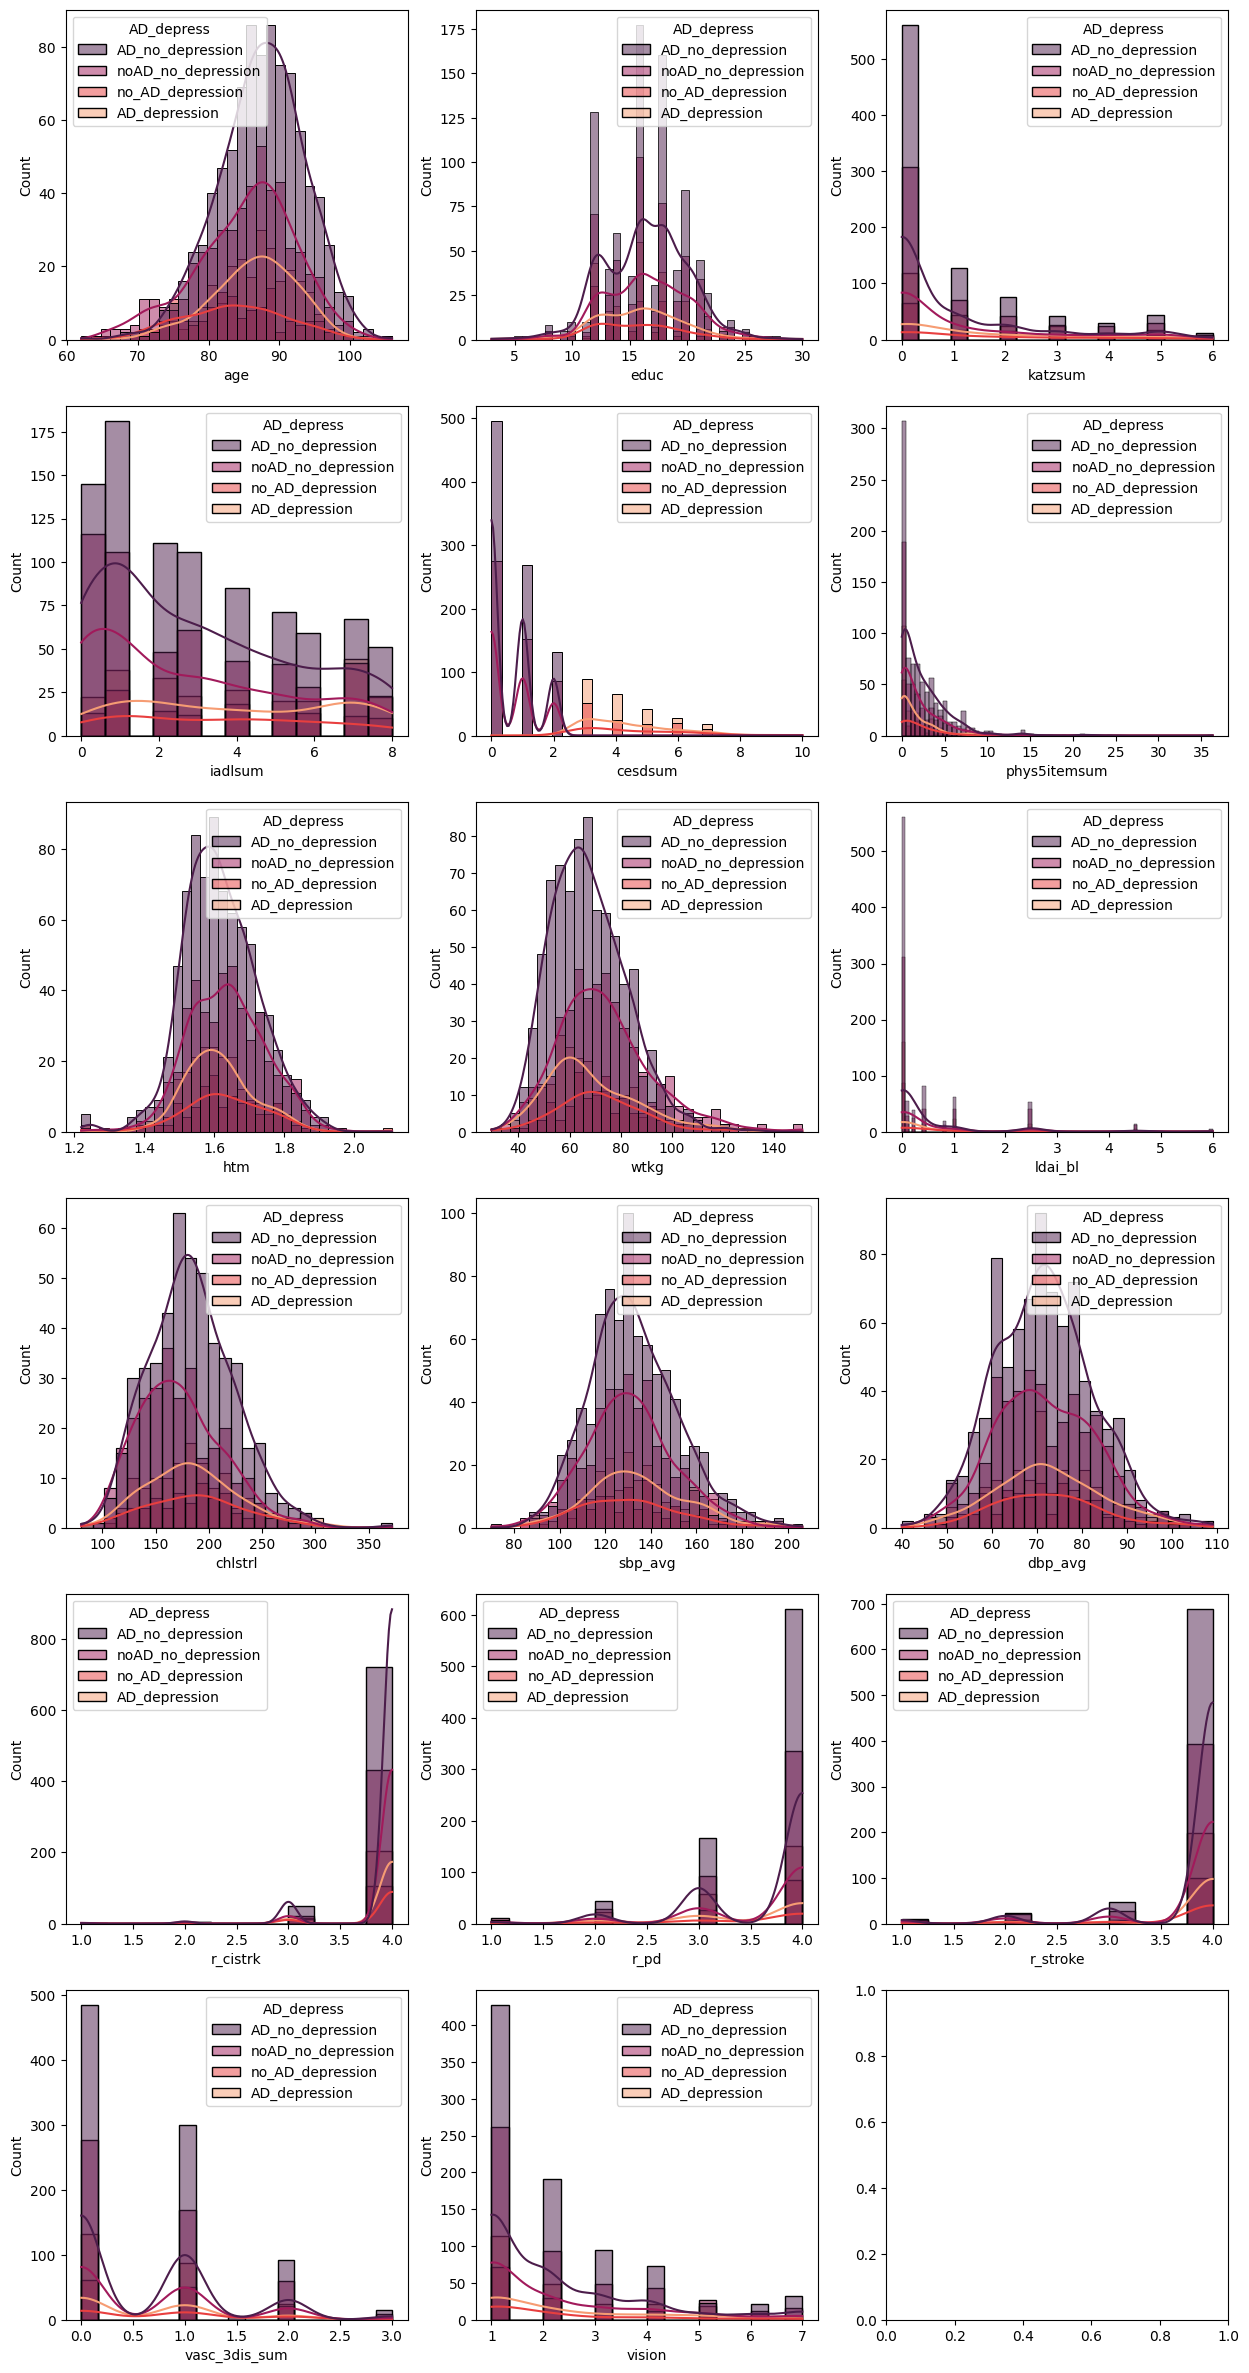

In [ ]:
# Distribution of Numerical Features

fig, axs = plt.subplots(ncols=3, nrows=6, figsize=(15, 30))

# Loop over each feature in numerical and multinomial lists
for i, column in enumerate(numerical_columns):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'target' class
    # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
    sns.histplot(data_redu, x=column, hue='AD_depress', kde=True, palette='rocket', ax=axs[x][y])

# Display all the subplots
plt.show()

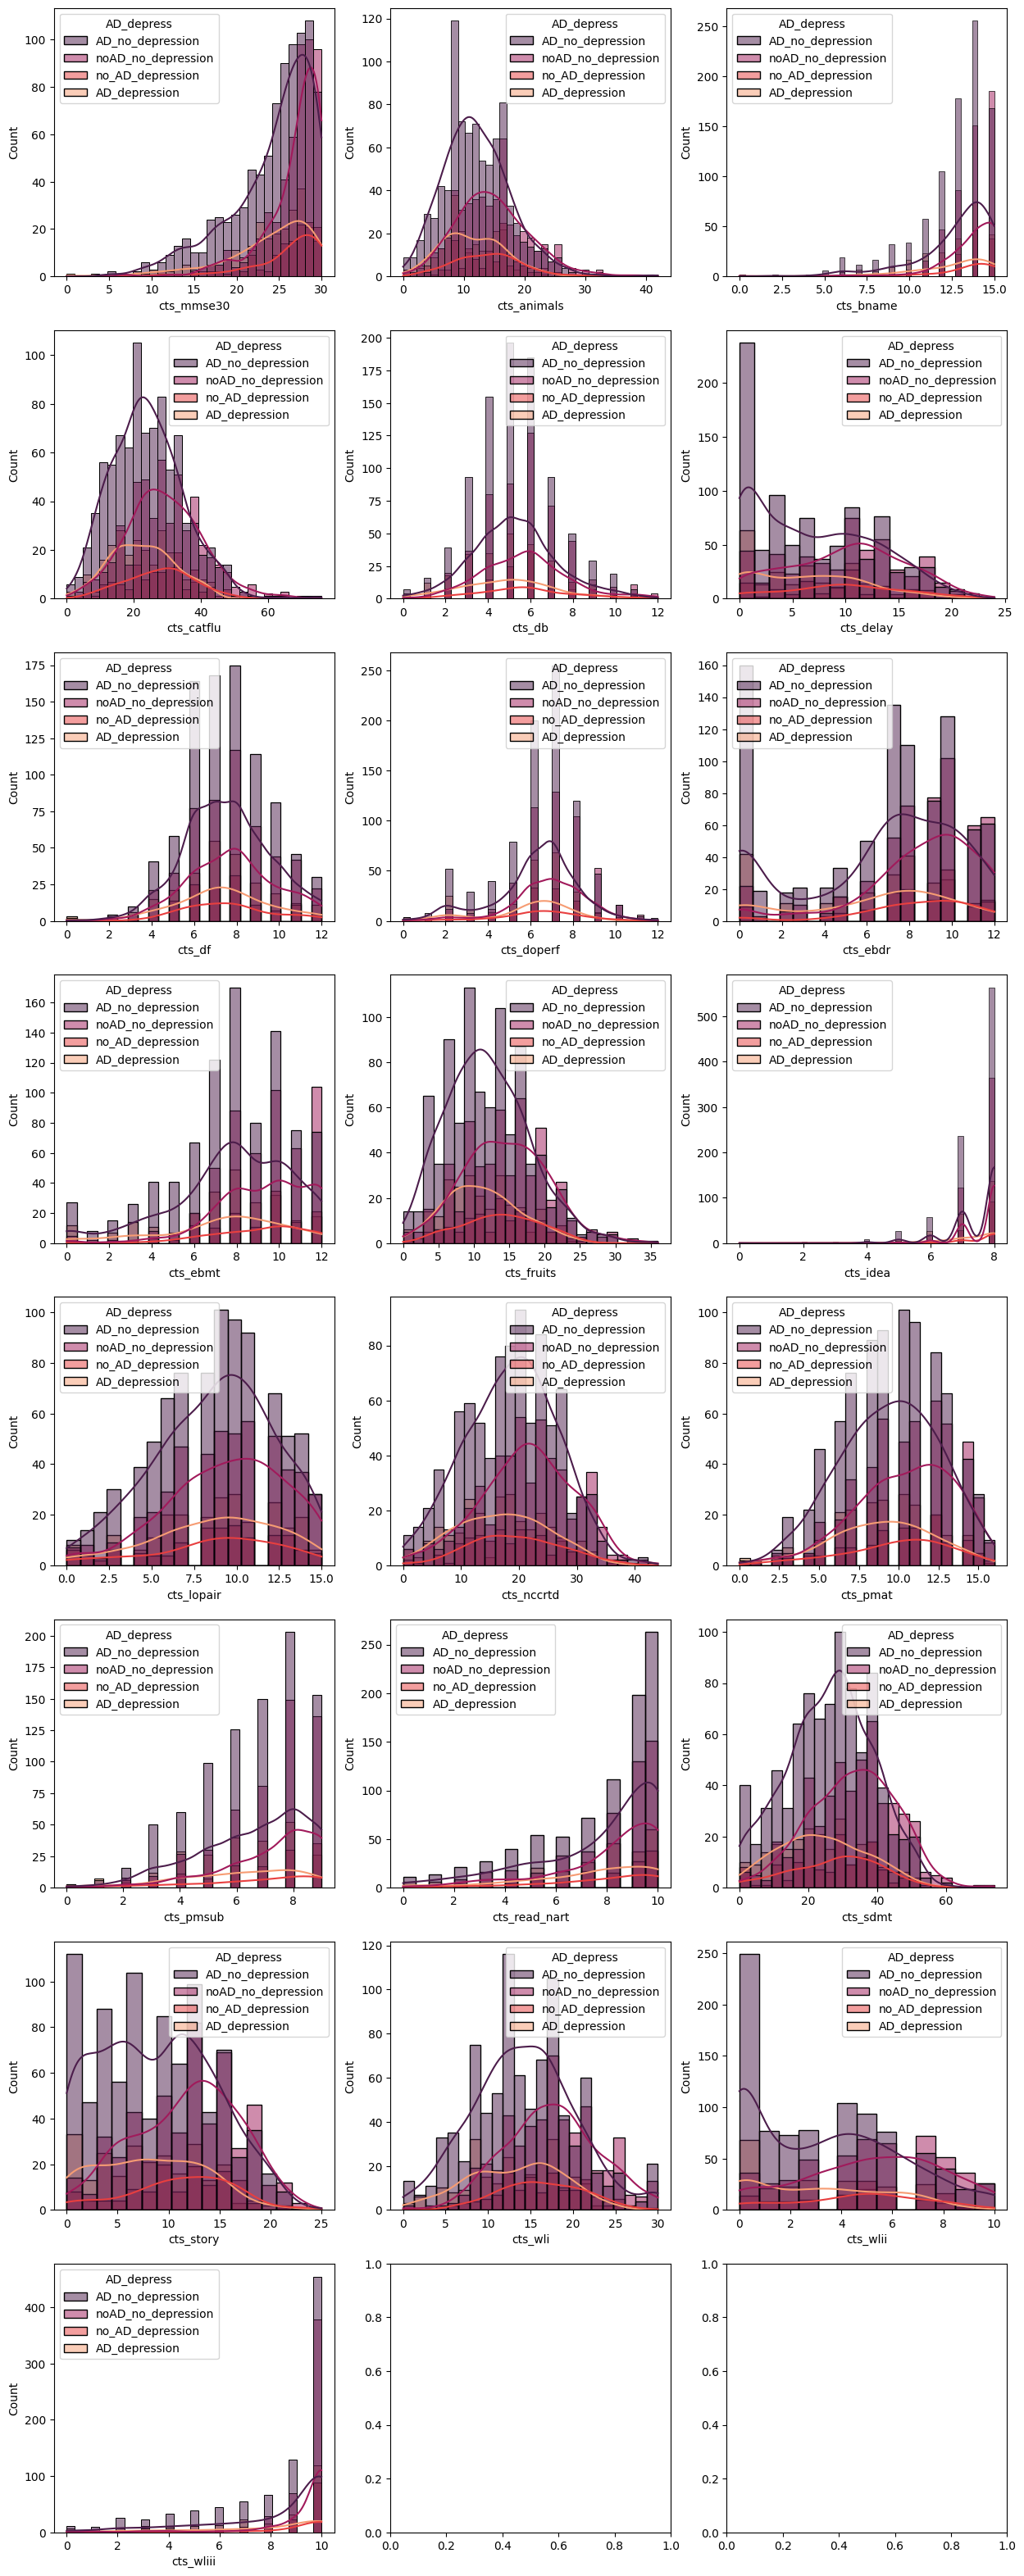

In [ ]:
# Distribution of Cognitive Score Features

# Create a grid of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(ncols=3, nrows=8, figsize=(15, 40))

# Loop over each feature in numerical and multinomial lists
for i, column in enumerate(cognitive):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'target' class
    # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
    sns.histplot(data_redu, x=column, hue='AD_depress', kde=True, palette='rocket', ax=axs[x][y])

# Display all the subplots
plt.show()

### 1.4 Correlation Matrices By Class

In [ ]:
# Checking for data imbalance

import plotly.express as px

# Compute the count of each class in the 'target' column
counts = data_redu['AD_depress'].value_counts()

# Define colors for the pie chart sections
colors = ['#581845', '#C70039', '#FF5733', '#FFC300']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of Classes in "target"',
    color_discrete_sequence=colors
)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='target'
    ),
    title=dict(
        text='Distribution of Classes in "AD_depress"',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

# Display the pie chart
fig.show()

### 1.5 Further feature engineering and data processing before pipeline

In [ ]:
# ldai is reported in as a weighted value, converting to categorical
data_redu['ldai_bl'].replace({6.0: 0, 4.5: 1, 2.5: 2, 1.0: 3, 0.8: 4, 0.4: 5, 0.2: 6, 0.1: 7, 0.0: 8}, inplace=True)


In [ ]:
data_redu.head()

,age,sex,race7,spanish,educ,retired,cogdx_stroke,dxpark,apoe_genotype,katzsum,iadlsum,cesdsum,phys5itemsum,htm,wtkg,ldai_bl,smoking,cancer_ever,chlstrl,claudication_ever,diabetes_sr_rx_ever,lipid_lowering_nonstatin_rx,lipid_lowering_rx_ever,headinjrloc_ever,heart_ever,sbp_avg,dbp_avg,hypertension_ever,r_cistrk,r_ms,r_pd,r_stroke,stroke_ever,thyroid_ever,vasc_3dis_sum,vision,cts_mmse30,cts_animals,cts_bname,cts_catflu,cts_db,cts_delay,cts_df,cts_doperf,cts_ebdr,cts_ebmt,cts_fruits,cts_idea,cts_lopair,cts_nccrtd,cts_pmat,cts_pmsub,cts_read_nart,cts_sdmt,cts_story,cts_wli,cts_wlii,cts_wliii,AD_depress
0,81.117043,2,1,0,22.0,0.0,2.0,2.0,34.0,0.0,6.0,1,0.250000,1.498603,48.5352,8.0,0.0,0,198.0,0.0,0,0,1,0.0,1,138.0,69.5,0,4.0,0.0,4.0,4.0,0.0,0,1.0,1.0,18.0,5,6.0,10,2.0,0.0,9.0,5.0,0.0,3.0,5,7.0,4.0,16.0,11.0,8.0,9.0,12.0,1.0,8.0,0.0,3.0,AD_no_depression
1,93.034908,2,1,0,16.0,1.0,2.0,2.0,33.0,0.0,1.0,1,7.166667,1.549403,60.7824,8.0,0.0,0,170.0,1.0,0,0,0,0.0,1,118.0,70.5,0,4.0,0.0,4.0,4.0,0.0,0,0.0,2.0,26.0,21,14.0,31,5.0,5.0,7.0,7.0,10.0,10.0,10,7.0,7.0,19.0,12.0,9.0,9.0,29.0,9.0,21.0,7.0,10.0,AD_no_depression
2,92.449008,2,1,0,12.0,0.0,2.0,2.0,33.0,4.0,7.0,0,0.000000,NaN,NaN,8.0,0.0,0,227.0,1.0,0,0,0,0.0,0,NaN,NaN,1,4.0,0.0,4.0,4.0,0.0,1,1.0,NaN,20.0,7,10.0,17,2.0,2.0,5.0,6.0,0.0,8.0,10,7.0,3.0,7.0,7.0,3.0,7.0,4.0,5.0,12.0,0.0,10.0,AD_no_depression
3,78.691307,2,1,0,16.0,1.0,1.0,2.0,34.0,0.0,4.0,0,2.708333,1.574803,42.6384,8.0,0.0,0,171.0,0.0,0,0,1,0.0,0,NaN,NaN,0,3.0,0.0,4.0,2.0,1.0,0,1.0,1.0,17.0,10,12.0,18,5.0,3.0,11.0,2.0,0.0,9.0,8,5.0,2.0,6.0,3.0,2.0,9.0,2.0,8.0,14.0,1.0,6.0,AD_no_depression
4,81.379877,2,1,0,12.0,1.0,1.0,2.0,23.0,0.0,2.0,0,0.583333,1.549403,NaN,8.0,0.0,1,194.0,0.0,0,0,0,0.0,0,140.0,62.0,1,4.0,0.0,3.0,1.0,1.0,1,1.0,1.0,30.0,15,15.0,33,6.0,10.0,6.0,7.0,11.0,11.0,18,8.0,7.0,30.0,11.0,7.0,6.0,49.0,17.0,17.0,4.0,10.0,noAD_no_depression


In [ ]:
# Categorizing Columns for reference
target_column = ['AD_depress']

binary_columns = ['sex', 'spanish', 'stroke_ever', 'retired', 'cogdx_stroke', 'dxpark', 'cancer_ever', 'claudication_ever', 'diabetes_sr_rx_ever', 'lipid_lowering_nonstatin_rx',
       'lipid_lowering_rx_ever', 'headinjrloc_ever', 'heart_ever', 'hypertension_ever', 'r_ms', 'thyroid_ever']

categorical_columns = ['race7','smoking', 'apoe_genotype', 'ldai_bl', 'cesdsum', 'katzsum', 'iadlsum', 'r_cistrk', 'r_pd', 'r_stroke', 'vasc_3dis_sum','vision']

cognitive = ["cts_mmse30", "cts_animals", "cts_bname", "cts_catflu", "cts_db", "cts_delay", "cts_df", "cts_doperf", "cts_ebdr", "cts_ebmt", "cts_fruits", "cts_idea", "cts_lopair",
             "cts_nccrtd", "cts_pmat", "cts_pmsub", "cts_read_nart", "cts_sdmt", "cts_story", "cts_wli", "cts_wlii", "cts_wliii"]

numerical_columns = [i for i in data_redu.columns if i not in categorical_columns + target_column + cognitive + binary_columns]

In [ ]:
#Switching 0 and 1's for all binary variables (sex,'dxpark' had 1's and 2's)
data_redu['sex'].replace({2: 0, 1: 1}, inplace=True)
data_redu['dxpark'].replace({2: 0, 1: 1}, inplace=True)
data_redu['cogdx_stroke'].replace({2: 0, 1: 1}, inplace=True)

In [ ]:
unique_values_col = data_redu['apoe_genotype'].unique()
print(unique_values_col)

[34. 33. 23. nan 44. 24. 22.]


In [ ]:
#replace missing values with the mode
mode_value = data_redu['apoe_genotype'].mode().iloc[0]  # Get the mode value from the Series

data_redu['apoe_genotype'].fillna(mode_value, inplace=True)

In [ ]:
#One hot encoding for apoe_genotype. There are 6 levels: 22 23 24 33 34
from sklearn.preprocessing import OneHotEncoder

# Create the encoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(data_redu[['apoe_genotype']])

# Convert to DataFrame for better readability
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['apoe_genotype']))  # Updated method

# Concatenate with the original DataFrame
data_redu = pd.concat([data_redu, encoded_df], axis=1)

# Drop the original categorical column
data_redu.drop('apoe_genotype', axis=1, inplace=True)

##looking at race

In [ ]:
# Count the occurrences of each category
category_counts = data_redu['race7'].value_counts()
cats = ["White", "Black or African American", "American Indian or Alaska Native", "Native Hawaiian or Other Pacific Islander", "Asian", "Other"]

# Create a pie chart
fig = px.pie(category_counts, values=category_counts, names=cats, title='Distribution of Race')

fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.75,
        xanchor="left",
        x=1.05,
        title='Race'
    ),
    width=700,
    height=550
)

fig.show()

In [ ]:
#Making race binary
target_level = 1.0

# Convert to binary
data_redu['race7'] = data_redu['race7'].apply(lambda x: 1 if x == target_level else 0)

In [ ]:
# converting categorical data into a numerical value
data_redu['AD_depress'].replace({"noAD_no_depression": 0, "AD_no_depression": 1, "no_AD_depression": 2, "AD_depression": 3}, inplace=True)

#2. ML Pipeline

### Splitting test & train data

In [ ]:
data_redu_copy = data_redu.copy()

In [ ]:
from sklearn.model_selection import train_test_split

X = data_redu_copy.drop("AD_depress", axis = 1)
y = data_redu_copy["AD_depress"]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##2.1 Imputation and Normalization

In [ ]:
#reorganizing cols

target_column = ['AD_depress']

binary_columns = ['sex', 'spanish', 'stroke_ever', 'retired', 'cogdx_stroke', 'dxpark', 'cancer_ever', 'claudication_ever', 'diabetes_sr_rx_ever', 'lipid_lowering_nonstatin_rx',
       'lipid_lowering_rx_ever', 'headinjrloc_ever', 'heart_ever', 'hypertension_ever', 'r_ms', 'thyroid_ever']

categorical_columns = ['smoking', 'ldai_bl', 'cesdsum', 'katzsum', 'iadlsum', 'r_cistrk', 'r_pd', 'r_stroke', 'vasc_3dis_sum','vision'] #removed race and apoe

cognitive_columns = ["cts_mmse30", "cts_animals", "cts_bname", "cts_catflu", "cts_db", "cts_delay", "cts_df", "cts_doperf", "cts_ebdr", "cts_ebmt", "cts_fruits", "cts_idea", "cts_lopair",
             "cts_nccrtd", "cts_pmat", "cts_pmsub", "cts_read_nart", "cts_sdmt", "cts_story", "cts_wli", "cts_wlii", "cts_wliii"]

numerical_columns = [i for i in data_redu.columns if i not in categorical_columns + target_column + cognitive + binary_columns]

In [ ]:
# Imputing missing data
from sklearn.discriminant_analysis import StandardScaler
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Mode imputation for binary_columns
for column in binary_columns:
    mode_value = X_train[column].mode().iloc[0]  # Get the mode value from the Series
    X_train[column].fillna(mode_value, inplace=True)

for column in binary_columns:
    mode_value = X_test[column].mode().iloc[0]  # Get the mode value from the Series
    X_test[column].fillna(mode_value, inplace=True)


# Mode imputation for categorical_colunms
for column in categorical_columns:
    mode_value = X_train[column].mode().iloc[0]  # Get the mode value from the Series
    X_train[column].fillna(mode_value, inplace=True)

for column in categorical_columns:
    mode_value = X_test[column].mode().iloc[0]  # Get the mode value from the Series
    X_test[column].fillna(mode_value, inplace=True)

In [ ]:
#Imputing numeric veriables with MICE
imputer = IterativeImputer(max_iter = 10, random_state=0)

X_train[numerical_columns] = imputer.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = imputer.fit_transform(X_test[numerical_columns])

X_train[cognitive_columns] = imputer.fit_transform(X_train[cognitive_columns])
X_test[cognitive_columns] = imputer.fit_transform(X_test[cognitive_columns])

In [ ]:
#Checking to make sure no missing vlaues
missing_value_counts = X_test.isnull().sum()
sum(missing_value_counts)

0

In [ ]:
# standardize
st_x = StandardScaler()
X_train_data = st_x.fit_transform(X_train)
X_test_data= st_x.fit_transform(X_test)

In [ ]:
missing_value_counts_std = pd.DataFrame(X_test_data).isnull().sum()
sum(missing_value_counts_std)

0

In [ ]:
#this code will give an error if Y is already a numpy array
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

In [ ]:
Y_train_df = pd.DataFrame(Y_train, columns=["AD_depress"])
Y_test_df = pd.DataFrame(Y_test, columns=["AD_depress"])

In [ ]:
X_train_colnames = X.columns

In [ ]:
X_train_df = pd.DataFrame(X_train_data, columns = X_train_colnames)

In [ ]:
X_train_df.head()

,age,sex,race7,spanish,educ,retired,cogdx_stroke,dxpark,katzsum,iadlsum,cesdsum,phys5itemsum,htm,wtkg,ldai_bl,smoking,cancer_ever,chlstrl,claudication_ever,diabetes_sr_rx_ever,lipid_lowering_nonstatin_rx,lipid_lowering_rx_ever,headinjrloc_ever,heart_ever,sbp_avg,dbp_avg,hypertension_ever,r_cistrk,r_ms,r_pd,r_stroke,stroke_ever,thyroid_ever,vasc_3dis_sum,vision,cts_mmse30,cts_animals,cts_bname,cts_catflu,cts_db,cts_delay,cts_df,cts_doperf,cts_ebdr,cts_ebmt,cts_fruits,cts_idea,cts_lopair,cts_nccrtd,cts_pmat,cts_pmsub,cts_read_nart,cts_sdmt,cts_story,cts_wli,cts_wlii,cts_wliii,apoe_genotype_22.0,apoe_genotype_23.0,apoe_genotype_24.0,apoe_genotype_33.0,apoe_genotype_34.0,apoe_genotype_44.0
0,-0.128795,1.394433,0.244949,-0.167384,0.442620,0.442141,1.794781,-0.233521,-0.653580,-0.829843,0.887503,-0.159378,1.282003,0.424089,0.654120,1.282197,-0.922621,0.009419,-0.622875,-0.537763,-0.207371,-0.958243,-0.322749,-0.526952,0.362717,1.035780,-1.450559,-6.404567,-0.026444,-0.971086,-3.526590,1.970776,-0.611000,0.521290,0.549391,-0.461950,-0.170599,-1.768965,-0.152461,-0.176540,-1.385992,0.197907,-0.694979,-2.002440,-0.866998,-0.114746,-1.747356,0.872390,0.457833,-1.206312,-1.401853,0.517430,-1.516995,-1.384875,-1.032096,-1.334756,-0.274582,-0.070112,-0.373271,-0.146333,-1.303840,1.954017,-0.122039
1,-1.104547,1.394433,0.244949,-0.167384,2.634280,-2.261722,-0.557171,-0.233521,-0.653580,0.355292,-0.774098,0.267883,1.795829,1.592995,0.654120,-0.639085,1.083869,-0.427209,-0.622875,-0.537763,-0.207371,-0.958243,3.098387,-0.526952,-0.738712,0.847406,-1.450559,0.234285,-0.026444,-0.971086,0.287885,-0.507414,1.636662,-0.820375,-0.707490,1.022181,0.680017,0.873255,0.211614,-0.666198,0.881568,1.604333,0.836848,-0.062463,0.247559,-0.285434,-0.587863,0.308034,1.446063,1.358843,1.139337,0.929084,2.112425,0.958085,1.146188,0.362096,0.600348,-0.070112,-0.373271,-0.146333,0.766965,-0.511766,-0.122039
2,-0.116561,-0.717137,0.244949,-0.167384,1.538450,0.442141,1.794781,-0.233521,-0.653580,-0.829843,-0.774098,-0.729060,0.768178,-0.402698,0.654120,1.282197,-0.922621,0.306120,-0.622875,1.859555,-0.207371,1.043576,-0.322749,1.897706,-1.289427,-0.565400,0.689389,0.234285,-0.026444,0.536098,0.287885,1.970776,1.636662,1.862954,-0.079049,1.022181,4.933092,-0.447855,4.216440,0.313117,1.928135,0.197907,1.347457,1.323234,0.619078,2.957635,0.571630,1.718924,0.457833,1.992552,1.139337,0.929084,1.494652,1.498768,0.978627,1.719577,0.600348,-0.070112,-0.373271,-0.146333,0.766965,-0.511766,-0.122039
3,1.300451,-0.717137,0.244949,-0.167384,-0.105295,0.442141,-0.557171,-0.233521,1.175506,1.540428,-0.774098,0.866049,0.254352,-0.431208,-1.646876,-0.639085,1.083869,1.347180,1.605459,-0.537763,-0.207371,-0.958243,3.098387,-0.526952,0.520064,0.470658,0.689389,0.234285,-0.026444,0.536098,0.287885,-0.507414,-0.611000,0.521290,-0.079049,0.810162,0.509894,-0.007485,0.211614,0.802775,0.881568,-0.270902,-0.184370,0.768955,0.247559,-0.114746,0.571630,0.872390,-0.159810,0.408280,0.631099,0.929084,-0.667556,0.777857,0.643507,0.701466,0.600348,-0.070112,-0.373271,-0.146333,-1.303840,1.954017,-0.122039
4,0.705213,-0.717137,0.244949,-0.167384,0.716578,0.442141,1.794781,-0.233521,-0.653580,-0.434798,-0.774098,1.563909,-0.773299,0.110480,0.654120,-0.639085,1.083869,-0.277678,-0.622875,-0.537763,-0.207371,-0.958243,3.098387,-0.526952,0.624962,-0.471213,-1.450559,0.234285,-0.026444,-0.971086,0.287885,-0.507414,1.636662,-0.820375,-0.707490,-0.249931,-0.000476,-0.447855,0.302633,-0.176540,0.358285,-0.270902,1.347457,0.768955,0.619078,0.568005,0.571630,0.308034,0.334305,0.408280,0.631099,0.929084,-0.127004,0.417402,0.643507,0.701466,0.600348,-0.070112,-0.373271,-0.146333,-1.303840,1.954017,-0.122039


##2.1 Upsampling

In [ ]:
# recombining X train and Y train
df_train_upsampled = pd.concat([X_train_df, Y_train_df], axis = 1)

In [ ]:
# upsampling X train
from collections import Counter

print("Count before resampling:", Counter(data_redu["AD_depress"]))

majority_levels = [1, 0]
df_majority = df_train_upsampled[df_train_upsampled['AD_depress'].isin(majority_levels)]
print("Count of majority classes:", Counter(df_majority["AD_depress"]))

minority_levels = [2, 3]
df_minority = df_train_upsampled[df_train_upsampled['AD_depress'].isin(minority_levels)]
print("Count of minority classes:", Counter(df_minority["AD_depress"]))

# Upsample minority class
df_minority_upsampled = df_minority.sample(n=len(df_majority), replace=True, random_state=42)  # random_state for reproducibility

# Combine majority class with upsampled minority class
df_train_upsampled_done = pd.concat([df_majority, df_minority_upsampled])

# Checking to see class balance
print("Count after resampling:", Counter(df_train_upsampled_done["AD_depress"]))

Count before resampling: Counter({1: 894, 0: 513, 3: 249, 2: 133})
Count of majority classes: Counter({1: 724, 0: 412})
Count of minority classes: Counter({3: 202, 2: 93})
Count after resampling: Counter({3: 796, 1: 724, 0: 412, 2: 340})


In [ ]:
df_train_upsampled_done

,age,sex,race7,spanish,educ,retired,cogdx_stroke,dxpark,katzsum,iadlsum,cesdsum,phys5itemsum,htm,wtkg,ldai_bl,smoking,cancer_ever,chlstrl,claudication_ever,diabetes_sr_rx_ever,lipid_lowering_nonstatin_rx,lipid_lowering_rx_ever,headinjrloc_ever,heart_ever,sbp_avg,dbp_avg,hypertension_ever,r_cistrk,r_ms,r_pd,r_stroke,stroke_ever,thyroid_ever,vasc_3dis_sum,vision,cts_mmse30,cts_animals,cts_bname,cts_catflu,cts_db,cts_delay,cts_df,cts_doperf,cts_ebdr,cts_ebmt,cts_fruits,cts_idea,cts_lopair,cts_nccrtd,cts_pmat,cts_pmsub,cts_read_nart,cts_sdmt,cts_story,cts_wli,cts_wlii,cts_wliii,apoe_genotype_22.0,apoe_genotype_23.0,apoe_genotype_24.0,apoe_genotype_33.0,apoe_genotype_34.0,apoe_genotype_44.0,AD_depress
1,-1.104547,1.394433,0.244949,-0.167384,2.634280,-2.261722,-0.557171,-0.233521,-0.653580,0.355292,-0.774098,0.267883,1.795829,1.592995,0.654120,-0.639085,1.083869,-0.427209,-0.622875,-0.537763,-0.207371,-0.958243,3.098387,-0.526952,-0.738712,0.847406,-1.450559,0.234285,-0.026444,-0.971086,0.287885,-0.507414,1.636662,-0.820375,-0.707490,1.022181,0.680017,0.873255,0.211614,-0.666198,0.881568,1.604333,0.836848,-0.062463,0.247559,-0.285434,-0.587863,0.308034,1.446063,1.358843,1.139337,0.929084,2.112425,0.958085,1.146188,0.362096,0.600348,-0.070112,-0.373271,-0.146333,0.766965,-0.511766,-0.122039,0
2,-0.116561,-0.717137,0.244949,-0.167384,1.538450,0.442141,1.794781,-0.233521,-0.653580,-0.829843,-0.774098,-0.729060,0.768178,-0.402698,0.654120,1.282197,-0.922621,0.306120,-0.622875,1.859555,-0.207371,1.043576,-0.322749,1.897706,-1.289427,-0.565400,0.689389,0.234285,-0.026444,0.536098,0.287885,1.970776,1.636662,1.862954,-0.079049,1.022181,4.933092,-0.447855,4.216440,0.313117,1.928135,0.197907,1.347457,1.323234,0.619078,2.957635,0.571630,1.718924,0.457833,1.992552,1.139337,0.929084,1.494652,1.498768,0.978627,1.719577,0.600348,-0.070112,-0.373271,-0.146333,0.766965,-0.511766,-0.122039,1
3,1.300451,-0.717137,0.244949,-0.167384,-0.105295,0.442141,-0.557171,-0.233521,1.175506,1.540428,-0.774098,0.866049,0.254352,-0.431208,-1.646876,-0.639085,1.083869,1.347180,1.605459,-0.537763,-0.207371,-0.958243,3.098387,-0.526952,0.520064,0.470658,0.689389,0.234285,-0.026444,0.536098,0.287885,-0.507414,-0.611000,0.521290,-0.079049,0.810162,0.509894,-0.007485,0.211614,0.802775,0.881568,-0.270902,-0.184370,0.768955,0.247559,-0.114746,0.571630,0.872390,-0.159810,0.408280,0.631099,0.929084,-0.667556,0.777857,0.643507,0.701466,0.600348,-0.070112,-0.373271,-0.146333,-1.303840,1.954017,-0.122039,1
4,0.705213,-0.717137,0.244949,-0.167384,0.716578,0.442141,1.794781,-0.233521,-0.653580,-0.434798,-0.774098,1.563909,-0.773299,0.110480,0.654120,-0.639085,1.083869,-0.277678,-0.622875,-0.537763,-0.207371,-0.958243,3.098387,-0.526952,0.624962,-0.471213,-1.450559,0.234285,-0.026444,-0.971086,0.287885,-0.507414,1.636662,-0.820375,-0.707490,-0.249931,-0.000476,-0.447855,0.302633,-0.176540,0.358285,-0.270902,1.347457,0.768955,0.619078,0.568005,0.571630,0.308034,0.334305,0.408280,0.631099,0.929084,-0.127004,0.417402,0.643507,0.701466,0.600348,-0.070112,-0.373271,-0.146333,-1.303840,1.954017,-0.122039,1
5,1.399587,1.394433,0.244949,-0.167384,3.730109,0.442141,1.794781,-0.233521,2.394896,1.145383,0.333636,0.410303,1.025091,0.965778,0.193920,-0.639085,-0.922621,-0.610977,1.605459,-0.537763,-0.207371,-0.958243,-0.322749,-0.526952,0.027885,0.015515,0.689389,0.234285,-0.026444,0.536098,0.287885,-0.507414,1.636662,0.521290,1.177832,0.174106,-1.021214,0.432885,-1.062649,0.802775,1.230424,-0.270902,-0.184370,0.214676,-0.123960,-0.968185,0.571630,0.872390,-0.653925,-1.492845,-0.893615,0.929084,-1.903104,1.678996,0.978627,2.058948,0.600348,-0.070112,-0.373271,-0.146333,-1.303840,1.954017,-0.122039,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,-2.092111,-0.717137,0.244949,-0.167

## 2.1.1 Visualizing Class Distribution After Resampling

In [ ]:
# Compute the count of each class in the 'target' column
counts = df_train_upsampled_done['AD_depress'].value_counts()
labels = ["noAD_no_depression", "AD_no_depression", "no_AD_depression", "AD_depression"]

# Define colors for the pie chart sections
colors = ['#581845', '#C70039', '#FF5733', '#FFC300']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=labels,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of Classes in "target"',
    color_discrete_sequence=colors
)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='target'
    ),
    title=dict(
        text='Distribution of Classes in "AD_depress" After Resampling',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=700,
    height=450
)

# Display the pie chart
fig.show()

In [ ]:
# Splitting X and Y train again from upsampled data

X_train_data = df_train_upsampled_done.drop("AD_depress", axis = 1)
X_train = X_train_data.to_numpy()

In [ ]:
Y_train_data = df_train_upsampled_done[["AD_depress"]].copy()
Y_train = Y_train_data.to_numpy()

#Machine learning models

Models considered
4. K-means Clusters
5. LDA
6. NN
7. Decision Tree (random forest)
8. SVM
9. NLP




# 4. K-Means Clustering

In [ ]:
#Standardizing and imputing the whole data set for K-means
# Imputing missing data

# Mode imputation for binary_columns
for column in binary_columns:
    mode_value = data_redu_copy[column].mode().iloc[0]  # Get the mode value from the Series
    data_redu_copy[column].fillna(mode_value, inplace=True)

# Mode imputation for categorical_colunms
for column in categorical_columns:
    mode_value = data_redu_copy[column].mode().iloc[0]  # Get the mode value from the Series
    data_redu_copy[column].fillna(mode_value, inplace=True)

#Imputing numeric veriables with MICE
imputer = IterativeImputer(max_iter = 10, random_state=0)

data_redu_copy[numerical_columns] = imputer.fit_transform(data_redu_copy[numerical_columns])
data_redu_copy[cognitive_columns] = imputer.fit_transform(data_redu_copy[cognitive_columns])

st_x = StandardScaler()
data_redu_copy_KM = st_x.fit_transform(data_redu_copy.drop('AD_depress', axis=1))

In [ ]:
#trying to preserve the veriable names and keep in dataframe rather than numpy array
data_redu_copy_drop = data_redu_copy.drop('AD_depress', axis=1)
column_names = data_redu_copy_drop.columns

# Step 3: Create a new DataFrame with imputed data and original column names
data_redu_copy_KM = pd.DataFrame(data_redu_copy_KM, columns=column_names)


In [ ]:
data_redu_copy_KM.head()

,age,sex,race7,spanish,educ,retired,cogdx_stroke,dxpark,katzsum,iadlsum,cesdsum,phys5itemsum,htm,wtkg,ldai_bl,smoking,cancer_ever,chlstrl,claudication_ever,diabetes_sr_rx_ever,lipid_lowering_nonstatin_rx,lipid_lowering_rx_ever,headinjrloc_ever,heart_ever,sbp_avg,dbp_avg,hypertension_ever,r_cistrk,r_ms,r_pd,r_stroke,stroke_ever,thyroid_ever,vasc_3dis_sum,vision,cts_mmse30,cts_animals,cts_bname,cts_catflu,cts_db,cts_delay,cts_df,cts_doperf,cts_ebdr,cts_ebmt,cts_fruits,cts_idea,cts_lopair,cts_nccrtd,cts_pmat,cts_pmsub,cts_read_nart,cts_sdmt,cts_story,cts_wli,cts_wlii,cts_wliii,apoe_genotype_22.0,apoe_genotype_23.0,apoe_genotype_24.0,apoe_genotype_33.0,apoe_genotype_34.0,apoe_genotype_44.0
0,-0.814888,-0.692629,0.240736,-0.164257,1.576950,-2.250424,-0.551304,-0.22472,-0.646376,1.148870,-0.231190,-0.654957,-1.238953,-1.332089,0.646132,-0.641252,-0.914743,0.543418,-0.629734,-0.530583,-0.206254,1.045178,-0.321931,1.955020,0.319873,-0.224678,-1.440098,0.239599,-0.040985,0.532979,0.298168,-0.507152,-0.611588,0.525165,-0.707627,-1.507005,-1.369294,-3.029725,-1.427718,-1.634430,-1.370101,0.668533,-0.679743,-1.962084,-1.903059,-1.300903,-0.551571,-1.378304,-0.409295,0.432820,0.654497,0.515207,-1.204017,-1.540135,-1.200619,-1.327266,-2.387942,-0.067021,-0.369587,-0.147316,-1.289264,1.919178,-0.128364
1,1.011665,-0.692629,0.240736,-0.164257,-0.081827,0.444361,-0.551304,-0.22472,-0.646376,-0.825509,-0.231190,1.738379,-0.728881,-0.555911,0.646132,-0.641252,-0.914743,-0.370731,1.587972,-0.530583,-0.206254,-0.956775,-0.321931,1.955020,-0.743929,-0.130457,-1.440098,0.239599,-0.040985,0.532979,0.298168,-0.507152,-0.611588,-0.817006,-0.073704,0.180938,1.390700,0.451485,0.495133,-0.182552,-0.505088,-0.283279,0.338438,0.766845,0.618588,-0.451145,-0.551571,-0.532790,-0.035007,0.747147,1.161080,0.515207,0.106017,-0.117105,0.976058,1.045096,0.603218,-0.067021,-0.369587,-0.147316,0.775636,-0.521056,-0.128364
2,0.921868,-0.692629,0.240736,-0.164257,-1.187678,-2.250424,-0.551304,-0.22472,1.816598,1.543746,-0.768332,-0.741463,-0.720539,-0.793302,0.646132,-0.641252,-0.914743,1.490216,1.587972,-0.530583,-0.206254,-0.956775,-0.321931,-0.511504,0.182699,0.120992,0.694397,0.239599,-0.040985,0.532979,0.298168,-0.507152,1.635088,0.525165,-0.707627,-1.085019,-1.024295,-1.289120,-0.786767,-1.634430,-1.024095,-1.235091,-0.170652,-1.962084,-0.101883,-0.451145,-0.551571,-1.660142,-1.532161,-0.824491,-1.878421,-0.314639,-1.820503,-0.828620,-0.530872,-1.327266,0.603218,-0.067021,-0.369587,-0.147316,0.775636,-0.521056,-0.128364
3,-1.186661,-0.692629,0.240736,-0.164257,-0.081827,0.444361,1.813882,-0.22472,-0.646376,0.359118,-0.768332,0.195686,-0.473844,-1.705804,0.646132,-0.641252,-0.914743,-0.338083,-0.629734,-0.530583,-0.206254,1.045178,-0.321931,-0.511504,-0.215252,-0.335737,-1.440098,-3.057650,-0.040985,0.532979,-3.432065,1.971796,-0.611588,0.525165,-0.707627,-1.717998,-0.506796,-0.418818,-0.695203,-0.182552,-0.851093,1.620345,-2.207014,-1.962084,0.258352,-0.791048,-2.824036,-1.941981,-1.656924,-2.081801,-2.385005,0.515207,-1.974625,-0.294983,-0.195999,-0.988357,-1.106016,-0.067021,-0.369587,-0.147316,-1.289264,1.919178,-0.128364
4,-0.774606,-0.692629,0.240736,-0.164257,-1.187678,0.444361,1.813882,-0.22472,-0.646376,-0.430633,-0.768332,-0.539616,-0.728881,-0.334653,0.646132,-0.641252,1.093203,0.412826,-0.629734,-0.530583,-0.206254,-0.956775,-0.321931,-0.511504,0.426253,-0.931337,0.694397,0.239599,-0.040985,-0.992620,-5.297182,1.971796,1.635088,0.525165,-0.707627,1.024910,0.355702,0.886636,0.678262,0.301408,0.359925,-0.759185,0.338438,1.039738,0.978823,0.908466,0.584661,-0.532790,1.337385,0.432820,0.147913,-0.729562,1.647234,1.305926,0.306311,0.028369,0.603218,-0.067021,2.705722,-0.147316,-1.289264,-0.521056,-0.128364


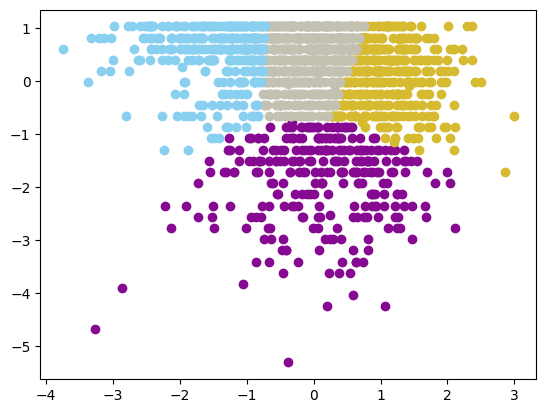

In [ ]:
# Function to visualize the clustering results
def plot_clusters(x, labels, k):
    # Define colors for each cluster
    colors = ['#860991', '#d6ba2f', '#c4c1b3', "#89CFF0"]
    # Loop through each cluster
    for i in range(k):
        # Filter the data points that belong to the current cluster
        filtered_label0 = x[labels == i]
        # Plot the filtered data points using the corresponding color
        plt.scatter(filtered_label0[:, 0], filtered_label0[:, 1], c=colors[i])
    # Display the plot
    plt.show()

# Choose two features for clustering and visualization
features = ['age', 'cts_mmse30'] #Note other features were used to trial improved visuilization

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data_features =  data_redu_copy_KM[features].to_numpy()

# Apply k-means clustering on the standardized data
# Here, we're specifying 4 clusters with a fixed random state for reproducibility
kmeans = KMeans(n_clusters=4, random_state=0)
label = kmeans.fit_predict(data_features)

# Visualize the clustering results using the defined function
plot_clusters(data_features, label, 4)


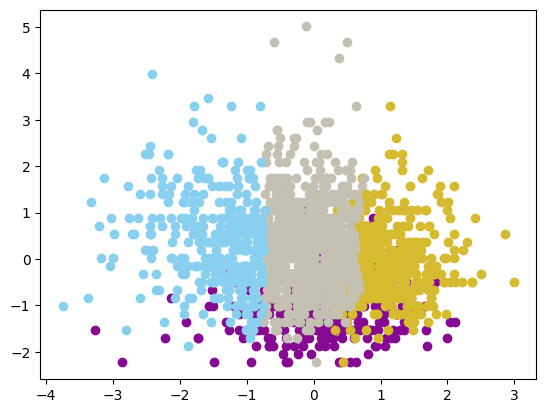

In [ ]:
#looking at K-Means with different features for visulization

# Choose two features for clustering and visualization
features2 = ['age', 'cts_animals']

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data_features2 =  data_redu_copy_KM[features2].to_numpy()

# Apply k-means clustering on the standardized data
# Here, we're specifying 4 clusters with a fixed random state for reproducibility
kmeans = KMeans(n_clusters=4, random_state=0)
label = kmeans.fit_predict(data_features)

# Visualize the clustering results using the defined function
plot_clusters(data_features2, label, 4)

#4.2 Finding the optimal K vlaue

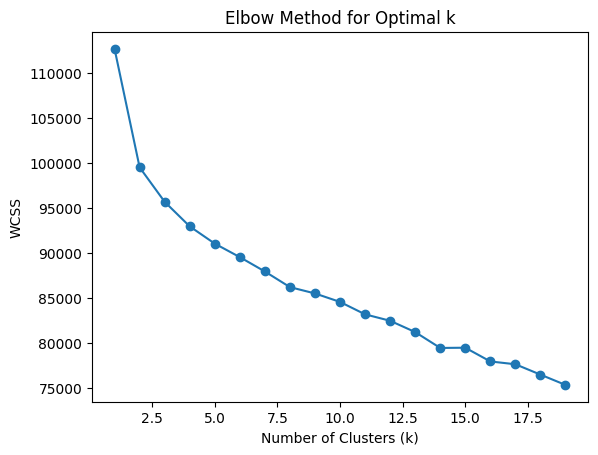

In [ ]:
# Create a list to store WCSS values for different k
wcss = []

# Choose a range of k values
k_values = range(1, 20)

# Calculate WCSS for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_redu_copy_KM)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

## 5. LDA

In [ ]:
class0_fpr, class1_fpr, class2_fpr, class3_fpr = {}, {}, {}, {}
class0_tpr, class1_tpr, class2_tpr, class3_tpr = {}, {}, {}, {}
class0_auc, class1_auc, class2_auc, class3_auc = {}, {}, {}, {}

In [ ]:
# Define utility functions for model evaluation

from sklearn.metrics import RocCurveDisplay, roc_curve, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix


def get_scores(Y, Y_pred):
    """
    Computes various evaluation metrics for model predictions.

    Parameters:
    - Y: Actual target values.
    - Y_pred: Predicted target values by the model.

    Returns:
    - conf_matrix: Confusion matrix showing true positives, true negatives, false positives, and false negatives.
    - class_report: Classification report detailing precision, recall, and F1-score for each class.
    - auc: Area Under the Curve (AUC) value for the model's predictions.
    - acc: Accuracy of the model's predictions.
    """
    conf_matrix = confusion_matrix(Y, Y_pred)
    class_report = classification_report(Y, Y_pred)
    acc = accuracy_score(Y, Y_pred)

    return conf_matrix, class_report, acc

def print_scores(conf_matrix, class_report, acc):
    """
    Prints the evaluation metrics in a structured format.

    Parameters:
    - conf_matrix: Confusion matrix from get_scores function.
    - class_report: Classification report from get_scores function.
    - auc: AUC value from get_scores function.
    - acc: Accuracy value from get_scores function.
    """

    print('Accuracy : ', acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

def multi_class_auc(Y, Y_prob):
  '''
  Prints out multi-class AUC Scores (one vs. rest)

  Y_prob = y_hat_prob prbabilities
  '''

  c = [0, 1, 2, 3] # 'noAD_no_depression', 'AD_no_depression', 'no_AD_depression', 'AD_depression'
  one_hot_encoded_Y = pd.get_dummies(Y, columns=["AD_depress"])
  one_hot_encoded_Y.columns = c

  for i in range(4):
    auc = roc_auc_score(one_hot_encoded_Y[c[i]], Y_prob[:,i], multi_class='ovr', average='macro')
    print(f"AUC (one vs. rest) Score for {c[i]} : ", auc)

def multi_class_roc(Y, Y_prob, Y_pred, model):
  '''
  Prints out multi-class AUC Scores (one vs. rest) and ROC curve

  Y_prob = y_hat_prob prbabilities
  '''

  c = [0, 1, 2, 3] # 'noAD_no_depression', 'AD_no_depression', 'no_AD_depression', 'AD_depression'
  one_hot_encoded_Y = pd.get_dummies(Y, columns=["AD_depress"])
  one_hot_encoded_Y.columns = c

  # computing auc, fpr, tpr and saving in dictionary
  auc, fpr, tpr = {}, {}, {}

  for i in range(4):
    auc[i] = roc_auc_score(one_hot_encoded_Y[c[i]], Y_prob[:,i], multi_class='ovr', average='macro')
    fpr[i], tpr[i], _ = roc_curve(one_hot_encoded_Y[c[i]], Y_prob[:, i])

  # saves fpr, tpr, auc in global variables for visualization later
  class0_fpr[model] = fpr[0]
  class1_fpr[model] = fpr[1]
  class2_fpr[model] = fpr[2]
  class3_fpr[model] = fpr[3]

  class0_tpr[model] = tpr[0]
  class1_tpr[model] = tpr[1]
  class2_tpr[model] = tpr[2]
  class3_tpr[model] = tpr[3]

  class0_auc[model] = auc[0]
  class1_auc[model] = auc[1]
  class2_auc[model] = auc[2]
  class3_auc[model] = auc[3]

  # Accuracy
  accuracy = accuracy_score(Y, Y_pred)

  # Recall (Sensitivity), Precision, F1-score (per class and macro average)
  recall = recall_score(Y, Y_pred, average='macro')
  precision = precision_score(Y, Y_pred, average='macro')
  f1 = f1_score(Y, Y_pred, average='macro')

  # AUC (per class and macro average)
  # For AUC, need to use softmax probabilities and one-hot encoding (binarized labels)
  roc_auc = roc_auc_score(one_hot_encoded_Y, Y_prob, multi_class='ovr', average='macro')

  epsilon = 1e-8  # Small value to prevent division by zero

  # Sensitivity (Recall) and Specificity per class
  cm = confusion_matrix(Y, Y_pred)
  sensitivity_per_class = cm.diagonal().astype(float) / cm.sum(axis=1).astype(float)

  # Calculate True Negative for each class
  TN = cm.sum() - (cm.sum(axis=0) + cm.sum(axis=1) - cm.diagonal())
  specificity_per_class = TN.astype(float) / (TN + cm.sum(axis=0) - cm.diagonal() + epsilon).astype(float)

  # Macro averages for Sensitivity and Specificity
  sensitivity = np.mean(sensitivity_per_class)
  specificity = np.mean(specificity_per_class)

  # Print the metrics
  print(f"Accuracy: {accuracy}")
  print(f"Sensitivity (Recall): {sensitivity}")
  print(f"Specificity: {specificity}")
  print(f"Precision: {precision}")
  print(f"F1 Score: {f1}")
  print(f"AUC: {roc_auc}")

  # Visualize the ROC curves for the validation data
  plt.figure(figsize=[10, 7])
  plt.plot(fpr[0], tpr[0], label=f"noAD_no_depression, AUC = {auc[0]:.2f}")
  plt.plot(fpr[1], tpr[1], label=f"AD_no_depression, AUC = {auc[1]:.2f}")
  plt.plot(fpr[2], tpr[2], label=f"no_AD_depression, AUC = {auc[2]:.2f}")
  plt.plot(fpr[3], tpr[3], label=f"AD_depression, AUC = {auc[3]:.2f}")
  plt.title("ROC Curves")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.legend(loc="lower right")
  plt.show()

## 5.2 LDA with Upsampled Data

## Cross-validation, Model Fitting (on training data), and Model Validation

note: data was already upsampled and imputed above

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Cross-validation using stratified K-fold
k = 5 # n splits
kf = StratifiedKFold(n_splits = 5)

In [ ]:
total_validation_loss=0
for train_index, valid_index in kf.split(X_train_data, Y_train_data):
  X_train_cv, X_valid_cv = pd.DataFrame(X_train_data.iloc[train_index]), pd.DataFrame(X_train_data.iloc[valid_index])
  Y_train_cv, Y_valid_cv = pd.DataFrame(Y_train_data.iloc[train_index]), pd.DataFrame(Y_train_data.iloc[valid_index])

  ### Model Fitting
  model_upsampling = LinearDiscriminantAnalysis()
  model_upsampling.fit(X_train_cv, np.ravel(Y_train_cv))
  y_hat_prob = model_upsampling.predict_proba(X_train_cv)
  y_hat = model_upsampling.predict(X_train_cv)

  ### Model Validation
  y_hat_prob_valid = model_upsampling.predict_proba(X_valid_cv)
  y_hat_valid = model_upsampling.predict(X_valid_cv)

  ### Evaluating the model's performance on the validation set
  conf_matrix, class_report, acc = get_scores(Y_valid_cv, y_hat_valid)
  print_scores(conf_matrix, class_report, acc)
  multi_class_auc(Y_valid_cv, y_hat_prob_valid)
  total_validation_loss+=acc
  print('\n')

Accuracy :  0.7362637362637363
Confusion Matrix:
[[ 42  40   0   1]
 [ 30 113   0   2]
 [  2   0  41  25]
 [  0   3  17 139]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.51      0.54        83
           1       0.72      0.78      0.75       145
           2       0.71      0.60      0.65        68
           3       0.83      0.87      0.85       159

    accuracy                           0.74       455
   macro avg       0.71      0.69      0.70       455
weighted avg       0.73      0.74      0.73       455

AUC (one vs. rest) Score for 0 :  0.8773157144707864
AUC (one vs. rest) Score for 1 :  0.9154171301446052
AUC (one vs. rest) Score for 2 :  0.9293585651314789
AUC (one vs. rest) Score for 3 :  0.9535526092129865


Accuracy :  0.6989010989010989
Confusion Matrix:
[[ 37  43   1   2]
 [ 35 104   0   5]
 [  0   1  36  31]
 [  0   4  15 141]]

Classification Report:
              precision    recall  f1-score   suppo

In [ ]:
total_validation_loss /= k
print("Total Validation Loss:", total_validation_loss)

Total Validation Loss: 0.7244779009536717


## 5.3 LDA Model Testing

Accuracy :  0.7988826815642458
Confusion Matrix:
[[ 71  30   0   0]
 [ 27 143   0   0]
 [  2   1  32   5]
 [  1   2   4  40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       101
           1       0.81      0.84      0.83       170
           2       0.89      0.80      0.84        40
           3       0.89      0.85      0.87        47

    accuracy                           0.80       358
   macro avg       0.82      0.80      0.81       358
weighted avg       0.80      0.80      0.80       358

Accuracy: 0.7988826815642458
Sensitivity (Recall): 0.7988026493512931
Specificity: 0.919770195171384
Precision: 0.8233120187018702
F1 Score: 0.8103075932386561
AUC: 0.9517379847081638


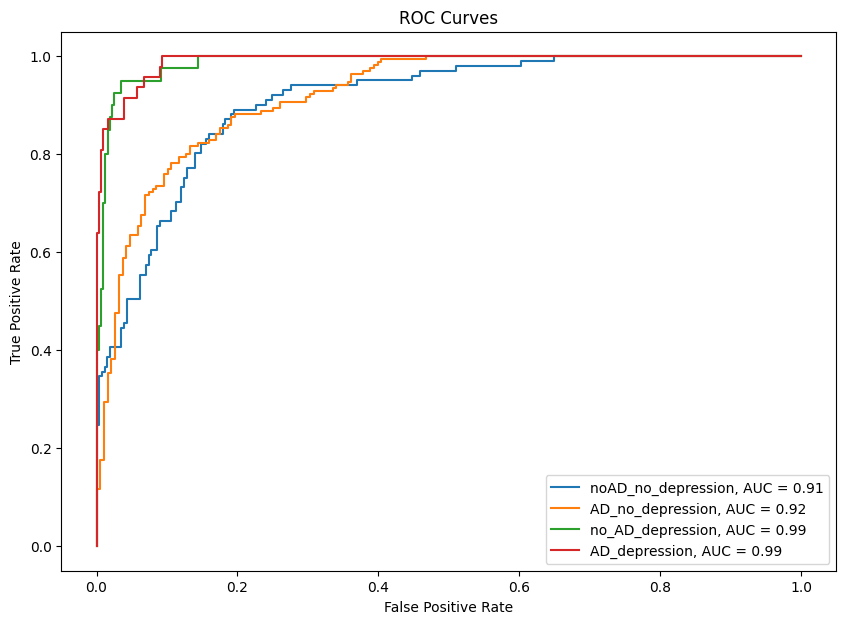

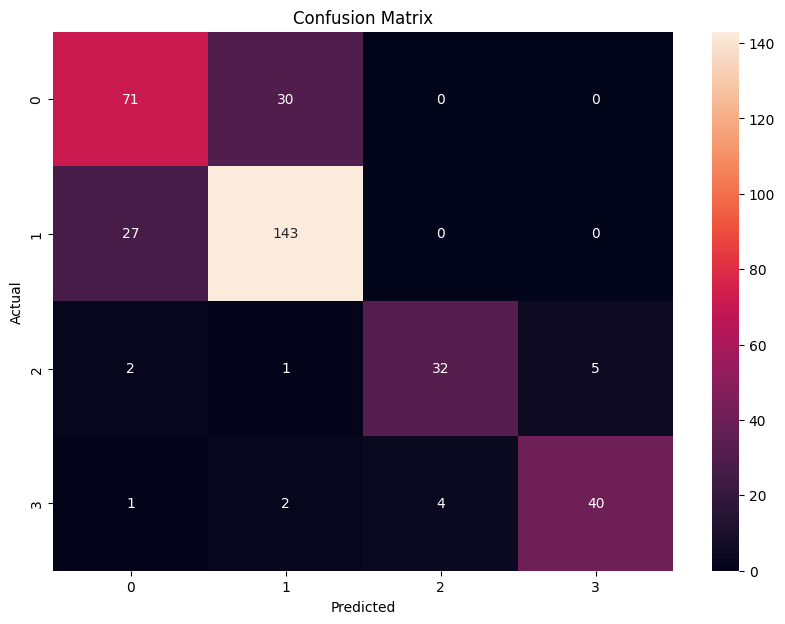

In [ ]:
# Data was already imputed above
# note: test data was not upsampled
model_upsampling = LinearDiscriminantAnalysis()
model_upsampling.fit(X_test, np.ravel(Y_test_df))
y_hat_prob_test_up = model_upsampling.predict_proba(X_test)
y_hat_test_up = model_upsampling.predict(X_test)

# Evaluating the model's performance on the validation set
conf_matrix, class_report, acc = get_scores(Y_test_df, y_hat_test_up)

# printing AUC scores and ROC curves
print_scores(conf_matrix, class_report, acc)

# plotting roc curves, and other test metrics
multi_class_roc(Y_test_df, y_hat_prob_test_up, y_hat_test_up, "LDA")

# visualizing confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##6. NN

In [ ]:
# importing torch as t
import torch as t
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh, softmax
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout, Softmax

#6.1 Building the model

In [ ]:
#What are we using?
X_train


array([[-1.10454684,  1.39443338,  0.24494897, ...,  0.76696499,
        -0.51176632, -0.12203941],
       [-0.11656124, -0.71713717,  0.24494897, ...,  0.76696499,
        -0.51176632, -0.12203941],
       [ 1.30045141, -0.71713717,  0.24494897, ..., -1.30384048,
         1.95401684, -0.12203941],
       ...,
       [ 0.29516973, -0.71713717,  0.24494897, ..., -1.30384048,
         1.95401684, -0.12203941],
       [-1.03114398, -0.71713717,  0.24494897, ..., -1.30384048,
         1.95401684, -0.12203941],
       [-1.5145904 , -0.71713717,  0.24494897, ...,  0.76696499,
        -0.51176632, -0.12203941]])

In [ ]:
Y_train


array([[0],
       [1],
       [1],
       ...,
       [3],
       [2],
       [3]])

In [ ]:
Y_train = Y_train.flatten()

In [ ]:
X_test_data

array([[ 0.35471639,  1.67586116,  0.22327869, ..., -1.23333968,
         1.7921397 , -0.15118579],
       [-0.12202258,  1.67586116,  0.22327869, ..., -1.23333968,
        -0.55799221, -0.15118579],
       [ 0.16607571, -0.59670814,  0.22327869, ..., -1.23333968,
        -0.55799221, -0.15118579],
       ...,
       [ 1.2432592 , -0.59670814,  0.22327869, ...,  0.81080664,
        -0.55799221, -0.15118579],
       [-1.30770529, -0.59670814, -4.4787078 , ...,  0.81080664,
        -0.55799221, -0.15118579],
       [ 0.20799586, -0.59670814,  0.22327869, ...,  0.81080664,
        -0.55799221, -0.15118579]])

In [ ]:
Y_test

array([1, 1, 0, 1, 0, 3, 0, 1, 1, 2, 3, 1, 2, 3, 1, 2, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 2, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 3, 0, 0, 1, 0, 2, 1, 3, 0, 1, 0, 0, 0, 1,
       3, 3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 3, 1, 0, 0, 1, 1, 0,
       1, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 2, 0, 1, 3,
       3, 1, 3, 0, 2, 3, 0, 3, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 2, 2,
       3, 1, 0, 1, 1, 1, 1, 2, 3, 2, 0, 2, 0, 1, 0, 1, 1, 1, 1, 3, 1, 0,
       1, 3, 3, 3, 3, 0, 0, 1, 1, 0, 0, 1, 0, 0, 3, 1, 1, 2, 1, 0, 1, 0,
       2, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2, 0, 1, 2, 3, 3, 3, 0, 2, 1, 1,
       0, 2, 1, 0, 1, 0, 3, 3, 2, 3, 1, 3, 0, 1, 3, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 3, 1, 1, 3, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 3, 1, 1, 1, 0,
       3, 2, 3, 1, 1, 1, 3, 3, 1, 0, 3, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 0,
       3, 1, 3, 1, 0, 2, 0, 3, 1, 1, 0, 0, 1, 1, 3,

In [ ]:
print(X_train.shape)

(2272, 63)
<class 'numpy.ndarray'>


In [ ]:
print(Y_train.shape)

(2272,)


In [ ]:
print(X_test.shape)
X_test_arr = X_test.to_numpy()

(358, 63)


In [ ]:
print(Y_test.shape)

(358,)
<class 'numpy.ndarray'>


In [ ]:
# Define the number of neurons in the first and second hidden layers
hidden_units_layer_1 = 5
hidden_units_layer_2 = 5

# FIRST LAYER: Define weights and biases for the first layer
W1 = t.randn((63, hidden_units_layer_1), requires_grad=True) #number of imput layers is number of varibles less outcome
B1 = t.zeros((1, hidden_units_layer_1), requires_grad=True)

# SECOND LAYER: Define weights and biases for the second layer
W2 = t.randn((hidden_units_layer_1, hidden_units_layer_2), requires_grad=True)
B2 = t.zeros((1, hidden_units_layer_2), requires_grad=True)

# THIRD LAYER: Define weights and biases for the output layer
W3 = t.randn((hidden_units_layer_2, 4), requires_grad=True) # i think the final layer has 4 nodes? bc there is 4 levels?
B3 = t.zeros((1, 4), requires_grad=True) #bc 4 output nodes

# Define the forward pass of the neural network
def forward(input):
    # First hidden layer with tanh activation
    out = tanh(input @ W1 + B1)

    # Second hidden layer with tanh activation
    out = tanh(out @ W2 + B2)

    # Output layer with softmax - since we are mapping probabilities from 1-4
    out = out @ W3 + B3   #isk before i had out = softmax(out @ W3 + B3)
    return out

In [ ]:
# Convert the training data to PyTorch tensors
X = t.Tensor(X_train).type(t.float32)
Y = t.Tensor(Y_train).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X, Y)

# Define training hyperparameters
epochs = 2000
learning_rate = 0.001
batch_size = 32

# DataLoader provides batches of data for training
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer (Adam) and include all weights and biases
optimizer = Adam([W1, B1, W2, B2, W3, B3], lr=learning_rate)

# Define the loss function for multiclass
loss_fn = t.nn.CrossEntropyLoss()

In [ ]:
train_loss_list = []

# Train the model for a specified number of epochs
for epoch in range(epochs):
    # Reduce the learning rate every 500 epochs
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    # Iterate over all batches of data
    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        logits = forward(X)

        # Convert Y to long datatype as CrossEntropyLoss expects class indices
        Y = Y.type(t.long)

        # Compute the loss
        loss = loss_fn(logits, Y)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record the loss for this batch
        per_epoch_loss_list.append(loss.item())

    # Record the average loss for this epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Text(0, 0.5, 'loss')

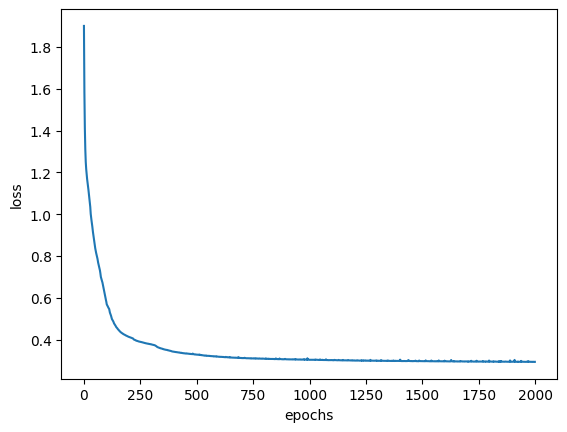

In [ ]:
# Plot the training loss over epochs
plt.plot([i for i in range(len(train_loss_list))], train_loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data
    X = t.Tensor(X_test).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y = t.Tensor(Y_test).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    probs = forward(X)  # Pass validation data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the validation loss
    print(loss.item())

    # Now, evaluate the model on the training data
    X = t.Tensor(X_train).type(t.float32)  # Convert training features to a PyTorch tensor
    Y = t.Tensor(Y_train).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs = forward(X)  # Pass training data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the training loss
    print(loss.item())

' '

In [ ]:
# Evaluate Model Performance on Validation Data
with t.no_grad():
    # Validation data
    X_val = t.Tensor(X_test).type(t.float32)
    Y_val = t.Tensor(Y_test).type(t.long)  # Ensure Y is long type for class indices

    # Predictions for validation data
    probs_val = forward(X_val)
    loss_val = loss_fn(probs_val, Y_val)
    print("Validation Loss:", loss_val.item())

    # Training data
    X_train_tensor = t.Tensor(X_train_data).type(t.float32)
    Y_train_tensor = t.Tensor(Y_train).type(t.long)  # Ensure Y is long type for class indices

    # Predictions for training data
    probs_train = forward(X_train_tensor)
    loss_train = loss_fn(probs_train, Y_train_tensor)
    print("Training Loss:", loss_train.item())

###6.2 Adding a Second layer, Regularization and Dropout on upsamped data

Hypertuning parameters as needed within the same code cell

In [ ]:
import torch.nn as nn

# Define hyperparameters
number_of_input_features = 63
number_of_classes = 4  # Assuming 4 classes
number_of_hidden_units_1 = 10
number_of_hidden_units_2 = 10
epochs = 100
learning_rate = 0.001
batch_size = 32
landa = 0.01  # Regularization term (lambda)
dropout_probablity = 0.6  # Probability of dropping out a neuron in dropout layer

# Prepare the data
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.long)

X_test_tensor = t.Tensor(X_test_data).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.long)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model with an additional hidden layer
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units_1),
    nn.Tanh(),
    Dropout(dropout_probablity),  # Dropout layer to prevent overfitting
    nn.Linear(number_of_hidden_units_1, number_of_hidden_units_2),  # Second hidden layer with 10 units
    nn.Tanh(),  # Activation function for the second hidden layer
    nn.Linear(number_of_hidden_units_2, number_of_classes)  # Output layer for multi-class
    # No softmax here - it's included in CrossEntropyLoss
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function with Cross-Entropy Loss
loss_fn = nn.CrossEntropyLoss()

# Lists to store training accuracy, validation accuracy, and training loss over epochs
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

for epoch in range(epochs):
    if epoch % 500 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        logits = model(X)

        # Adding regularization term for all parameters in the model
        l2_term = sum([(w ** 2).sum() for w in model.parameters()])

        # New loss is the old loss + regularization term
        loss = loss_fn(logits, Y) + landa * l2_term

        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        model.eval()

        # Train accuracy
        logits_train = model(X_train_tensor)
        prediction_train = t.argmax(logits_train, dim=1)
        train_accuracy = (prediction_train == Y_train_tensor).type(t.float32).mean().item()

        # Validation accuracy
        logits_val = model(X_test_tensor)
        prediction_val = t.argmax(logits_val, dim=1)
        validation_accuracy = (prediction_val == Y_test_tensor).type(t.float32).mean().item()

        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}, Validation Accuracy: {validation_accuracy}')

        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Epoch 0/100 ---> Train Accuracy: 0.4427816867828369, Validation Accuracy: 0.44692736864089966
Epoch 1/100 ---> Train Accuracy: 0.5682218074798584, Validation Accuracy: 0.4608938694000244
Epoch 2/100 ---> Train Accuracy: 0.6404049396514893, Validation Accuracy: 0.5474860072135925
Epoch 3/100 ---> Train Accuracy: 0.6694542169570923, Validation Accuracy: 0.6117318272590637
Epoch 4/100 ---> Train Accuracy: 0.6756162047386169, Validation Accuracy: 0.6284916400909424
Epoch 5/100 ---> Train Accuracy: 0.6949824094772339, Validation Accuracy: 0.6368715167045593
Epoch 6/100 ---> Train Accuracy: 0.6910211443901062, Validation Accuracy: 0.6452513933181763
Epoch 7/100 ---> Train Accuracy: 0.7086267471313477, Validation Accuracy: 0.6452513933181763
Epoch 8/100 ---> Train Accuracy: 0.6985034942626953, Validation Accuracy: 0.6368715167045593
Epoch 9/100 ---> Train Accuracy: 0.7033450603485107, Validation Accuracy: 0.6452513933181763
Epoch 10/100 ---> Train Accuracy: 0.7147887349128723, Validation Accu

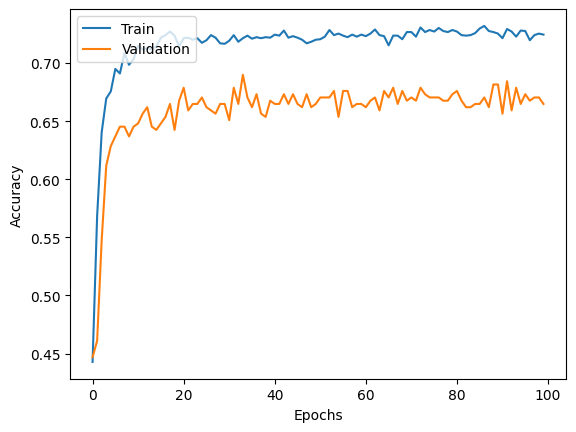

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Confusion Matrix:
 [[ 30  71   0   0]
 [ 12 157   0   1]
 [  0   0   8  32]
 [  0   0   4  43]]


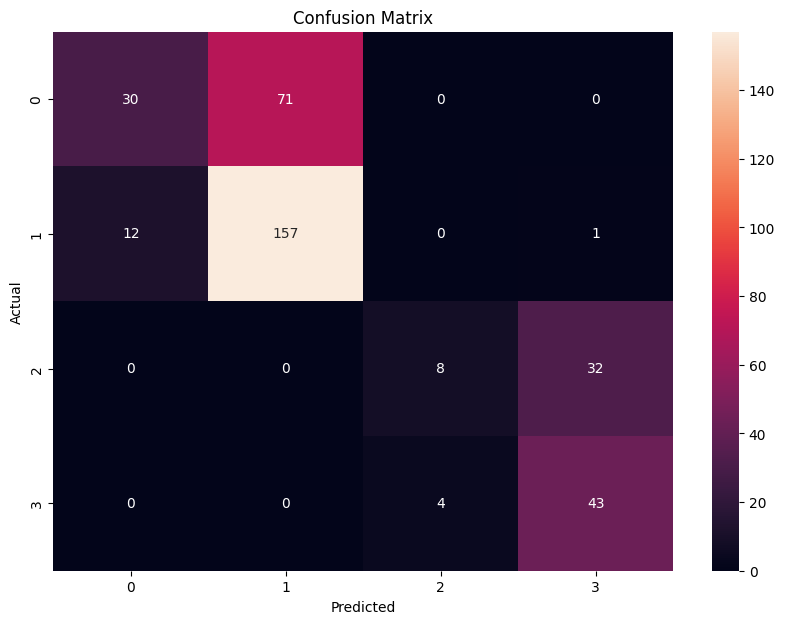

F1 Score: 0.62


In [ ]:
import torch as t
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score

# Assuming model, X_test_tensor, and Y_test_tensor are already defined and the model is trained

# Predict on the test set
with t.no_grad():
    model.eval()  # Set the model to evaluation mode
    logits = model(X_test_tensor)
    predictions = t.argmax(logits, dim=1).numpy()  # Convert to numpy array for sklearn compatibility

# Actual labels
actual_labels = Y_test_tensor.numpy()

# Compute the confusion matrix
cm = confusion_matrix(actual_labels, predictions)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

# Optional: Plot using Matplotlib and Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

f1 = f1_score(actual_labels, predictions, average='weighted')  # Use 'weighted' for imbalanced classes
print("F1 Score: {:.2f}".format(f1))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Make sure the model is in evaluation mode
model.eval()

# Get predictions for the test set
logits_test = model(X_test_tensor)
predictions = t.argmax(logits_test, dim=1).numpy()

# True labels
true_labels = Y_test_tensor.numpy()

# Classification Report
print("Classification Report:")
print(classification_report(true_labels, predictions))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(true_labels, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.30      0.42       101
           1       0.69      0.92      0.79       170
           2       0.67      0.20      0.31        40
           3       0.57      0.91      0.70        47

    accuracy                           0.66       358
   macro avg       0.66      0.58      0.55       358
weighted avg       0.68      0.66      0.62       358

Confusion Matrix:
[[ 30  71   0   0]
 [ 12 157   0   1]
 [  0   0   8  32]
 [  0   0   4  43]]


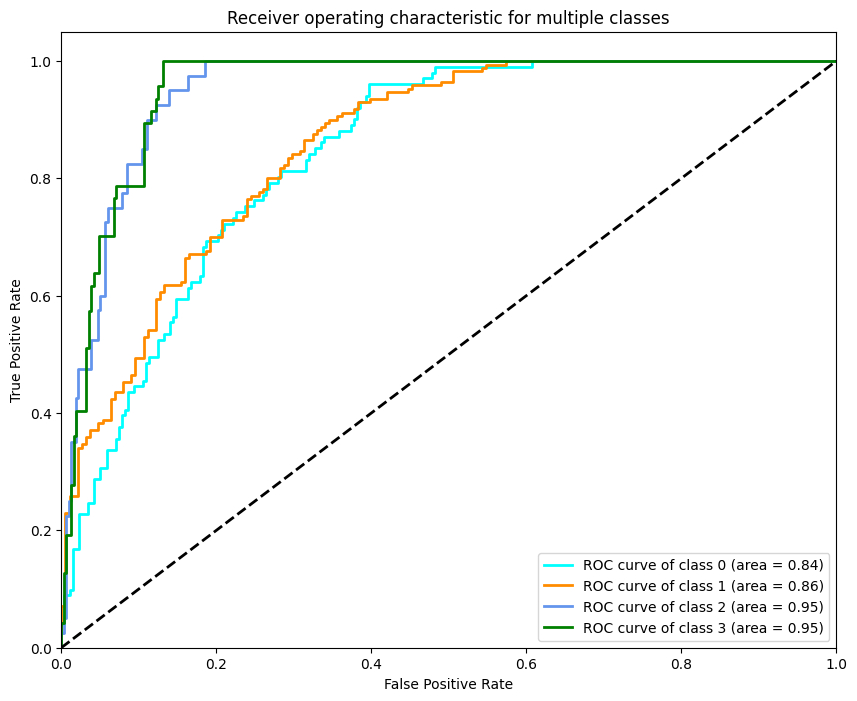

In [ ]:
#ROC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for multi-class
n_classes = number_of_classes
Y_test_binarized = label_binarize(true_labels, classes=range(n_classes))

# Compute the softmax probabilities
softmax_probs = t.softmax(logits_test, dim=1).detach().numpy()

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], softmax_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple']  # Extend colors if you have more classes
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiple classes')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix

# Predictions and true labels
predictions = t.argmax(logits_test, dim=1).detach().numpy()
true_labels = Y_test_tensor.numpy()

# Accuracy
accuracy = accuracy_score(true_labels, predictions)

# Recall (Sensitivity), Precision, F1-score (per class and macro average)
recall = recall_score(true_labels, predictions, average='macro')
precision = precision_score(true_labels, predictions, average='macro')
f1 = f1_score(true_labels, predictions, average='macro')

# AUC (per class and macro average)
# For AUC, need to use softmax probabilities and one-hot encoding (binarized labels)
roc_auc = roc_auc_score(Y_test_binarized, softmax_probs, multi_class='ovr', average='macro')

epsilon = 1e-8  # Small value to prevent division by zero

# Sensitivity (Recall) and Specificity per class
cm = confusion_matrix(true_labels, predictions)
sensitivity_per_class = cm.diagonal().astype(float) / cm.sum(axis=1).astype(float)

# Calculate True Negative for each class
TN = cm.sum() - (cm.sum(axis=0) + cm.sum(axis=1) - cm.diagonal())
specificity_per_class = TN.astype(float) / (TN + cm.sum(axis=0) - cm.diagonal() + epsilon).astype(float)

# Macro averages for Sensitivity and Specificity
sensitivity = np.mean(sensitivity_per_class)
specificity = np.mean(specificity_per_class)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Sensitivity (Recall): {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"AUC: {roc_auc}")




Accuracy: 0.664804469273743
Sensitivity (Recall): 0.5838631829390699
Specificity: 0.8642399693217474
Precision: 0.6588345864661654
F1 Score: 0.5538511106901841
AUC: 0.9021097927358003


#7. Classification using a Decision Trees

## 7.1 Decision Tree Classifier

In [ ]:
# Initializing a Decision Tree classifier
dt = tree.DecisionTreeClassifier(criterion='entropy',class_weight='balanced')

In [ ]:
# Creating a pipeline that first preprocesses the data and then applies the decision tree
model = Pipeline([
    ('DT', dt)
])

In [ ]:
# Training the model on the training data
model = model.fit(X_train, Y_train)

In [ ]:
# Predicting and evaluating the model's performance on the training data
Y_pred = model.predict(X_train)
print("Initial Train Accuracy:", accuracy_score(Y_train, Y_pred))

# Predicting the target variable on the test set and evaluating the model's accuracy.
Y_pred = model.predict(X_test)
print("Initial Test Accuracy;", accuracy_score(Y_test, Y_pred))

Initial Train Accuracy: 1.0
Initial Test Accuracy; 0.3854748603351955


##7.1.1 Hyperparameter Tuning using Grid Search - Decision Tree

In [ ]:
# Define the hyperparameter values that should be tested
param_dist = {
    "DT__max_depth" : [5, 10, 15, 20 ,25, 30, 35],
    "DT__min_samples_leaf" : [5, 10, 15, 20 ,25],
    "DT__splitter" : ['best', 'random'],
    "DT__max_features" : ['sqrt', 'log2']
}

# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
random_search = GridSearchCV(
    model, param_grid=param_dist, cv=skf
)

# Train Grid Search on the training data
random_search.fit(X_train, Y_train)

# Extract results into a DataFrame
results = pd.DataFrame(random_search.cv_results_)

# Display the set of parameters that achieved the best score
results[results['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_DT__max_depth,param_DT__max_features,param_DT__min_samples_leaf,param_DT__splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
40,0.006279,0.000583,0.000831,0.000072,15,sqrt,5,best,"{'DT__max_depth': 15, 'DT__max_features': 'sqr...",0.764835,0.676923,0.786344,0.665198,0.682819,0.715224,0.050078,1


In [ ]:
# Retrieve the best hyperparameters after Grid Search
random_search.best_params_

{'DT__max_depth': 15,
 'DT__max_features': 'sqrt',
 'DT__min_samples_leaf': 5,
 'DT__splitter': 'best'}

## 7.1.2 Decision Tree Model Testing

Train Accuracy 0.8367077464788732
Accuracy :  0.4134078212290503
Confusion Matrix:
[[  4  59   0  38]
 [  6 102   0  62]
 [  0   3   0  37]
 [  1   4   0  42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.04      0.07       101
           1       0.61      0.60      0.60       170
           2       0.00      0.00      0.00        40
           3       0.23      0.89      0.37        47

    accuracy                           0.41       358
   macro avg       0.30      0.38      0.26       358
weighted avg       0.42      0.41      0.36       358



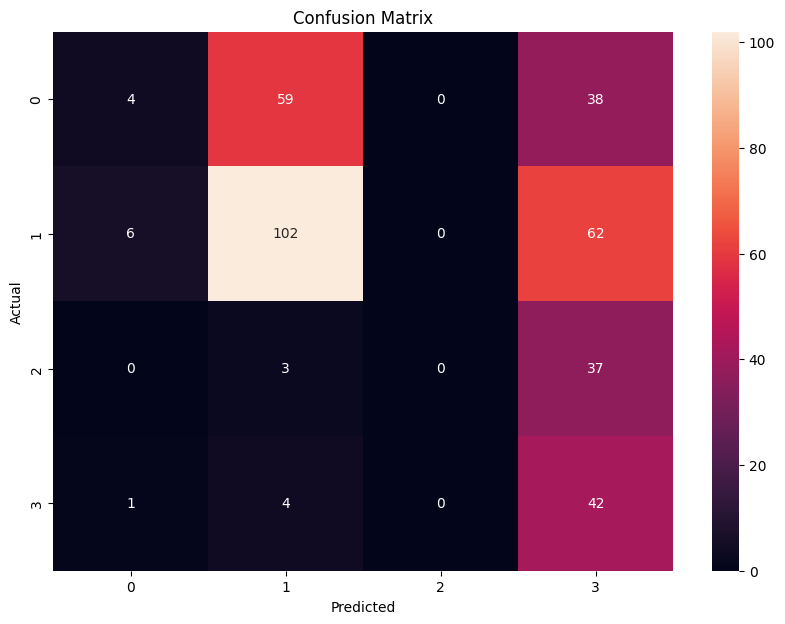

Accuracy: 0.4134078212290503
Sensitivity (Recall): 0.3833052454181588
Specificity: 0.7952960866379954
Precision: 0.3013540230719002
F1 Score: 0.26166507080394075
AUC: 0.6111949378380335


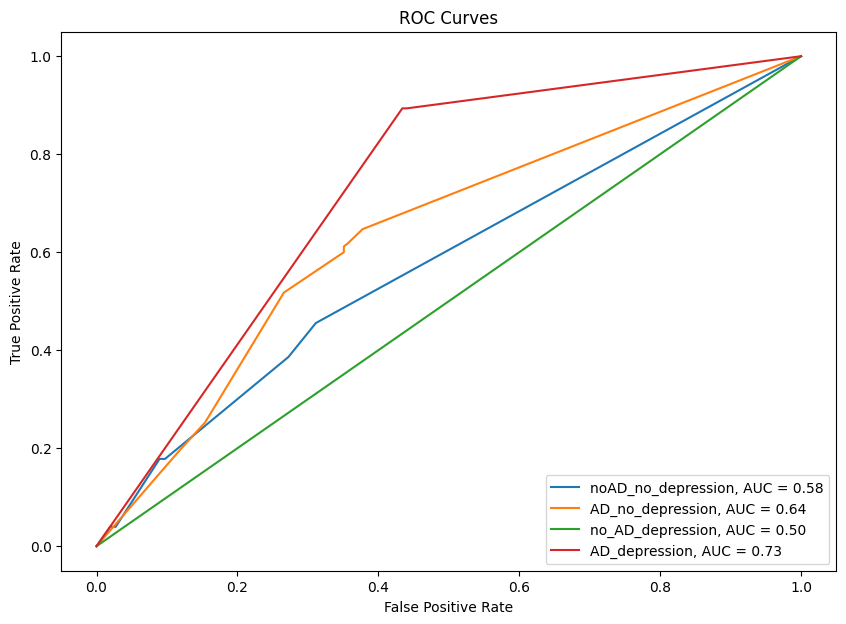

In [ ]:
# Update the model's hyperparameters to the best found during Grid Search

dt_best_params = {'DT__max_depth': 15,
 'DT__max_features': 'sqrt',
 'DT__min_samples_leaf': 5,
 'DT__splitter': 'best'}

model = model.set_params(**dt_best_params)

# Refit the model using the training data
model = model.fit(X_train, Y_train)

# Make predictions on the training set and compute the accuracy
Y_pred = model.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_pred)
print("Train Accuracy", train_accuracy)

# Make predictions on the test set and compute the accuracy
Y_pred_dt = model.predict(X_test)
Y_pred_prob_dt = model.predict_proba(X_test)

# Evaluating the model's performance on the validation set
conf_matrix, class_report, acc = get_scores(Y_test, Y_pred_dt)

# printing AUC scores and ROC curves
print_scores(conf_matrix, class_report, acc)

# visualizing confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

multi_class_roc(Y_test, Y_pred_prob_dt, Y_pred_dt, "DT")

#7.2 Random Forest Classifier

In [ ]:
# Initialize a Random Forest classifier
# The criterion 'entropy' measures the quality of a split by how mixed the classes are in two groups
# class_weight 'balanced_subsample' is used to handle imbalanced classes. It computes weights based on the bootstrap sample for every tree grown.
# oob_score is set to True to use out-of-bag samples to estimate the generalization accuracy
random_forest = RandomForestClassifier(criterion='entropy', class_weight='balanced_subsample', oob_score=True)

# Creating a pipeline which first applies the column transformer preprocessing, then fits the Random Forest model
model = Pipeline([
    ('random_forest', random_forest)
])

In [ ]:
# Using the pipeline model to train on the training data.
# Dropping the target column ('suicide_level') from the input features.
model = model.fit(X_train, Y_train)

# Predicting the target variable on the training set and evaluating the model's accuracy.
Y_pred = model.predict(X_train)
print("Intial Train Accuracy:", accuracy_score(Y_train, Y_pred))

# Predicting the target variable on the test set and evaluating the model's accuracy.
Y_pred = model.predict(X_test)
print("Intial Test Accuracy:", accuracy_score(Y_test, Y_pred))

Intial Train Accuracy: 1.0
Intial Test Accuracy: 0.34916201117318435


##7.2.1 Hyperparameter tuning with Grid Search - Random Forest

In [ ]:
# Setting hyperparameters for Random Forest for the Grid Search.
param_dist = {
    "random_forest__n_estimators" : [200],
    "random_forest__max_depth" : [5, 10, 15],
    "random_forest__min_samples_leaf" : [15, 20 ,25],
    "random_forest__max_features" : ['sqrt']
}

# Initializing stratified K-fold cross-validation. This ensures each fold has the same proportion of target labels as the whole dataset.
skf = StratifiedKFold(n_splits=5)

# Setting up GridSearchCV to search through the parameter space.
# It will evaluate the model for each combination of hyperparameters provided using stratified K-fold cross-validation.
random_search = GridSearchCV(
    model, param_grid=param_dist, cv=skf
)

# Running the GridSearchCV on the training data.
random_search.fit(X_train, Y_train)

# Extracting the results of the Grid Search into a DataFrame for analysis.
results = pd.DataFrame(random_search.cv_results_)

# Filtering to get the rows with the best performing hyperparameters.
results[results['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__min_samples_leaf,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,1.038388,0.205782,0.02503,0.005066,15,sqrt,15,200,"{'random_forest__max_depth': 15, 'random_fores...",0.769231,0.771429,0.830396,0.792952,0.80837,0.794475,0.02304,1


## 7.2.2 Random Forest Model Testing

Accuracy :  0.28212290502793297
Confusion Matrix:
[[57  0 43  1]
 [96  0 67  7]
 [ 0  0 39  1]
 [ 0  0 42  5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.56      0.45       101
           1       0.00      0.00      0.00       170
           2       0.20      0.97      0.34        40
           3       0.36      0.11      0.16        47

    accuracy                           0.28       358
   macro avg       0.23      0.41      0.24       358
weighted avg       0.17      0.28      0.19       358



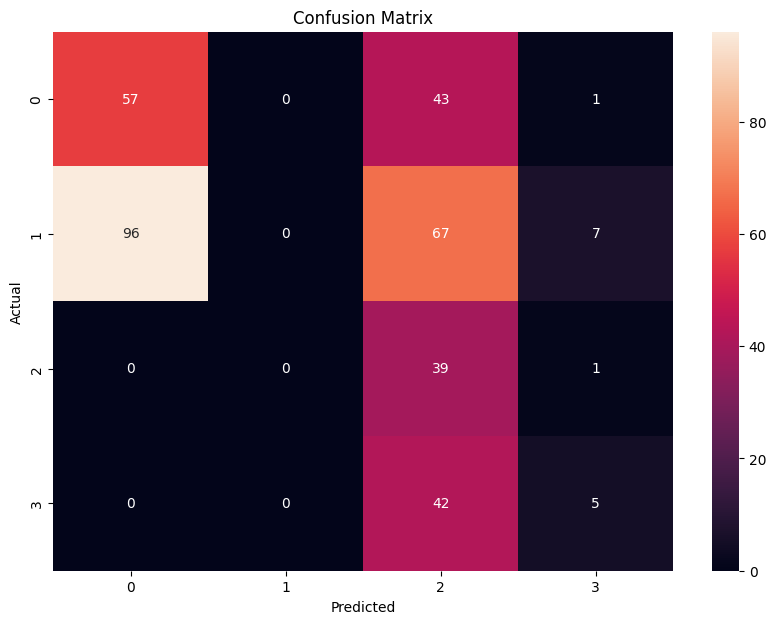

Accuracy: 0.28212290502793297
Sensitivity (Recall): 0.41143485359174214
Specificity: 0.7798832039269014
Precision: 0.23347008960652327
F1 Score: 0.23760391538241027
AUC: 0.7199588706929508


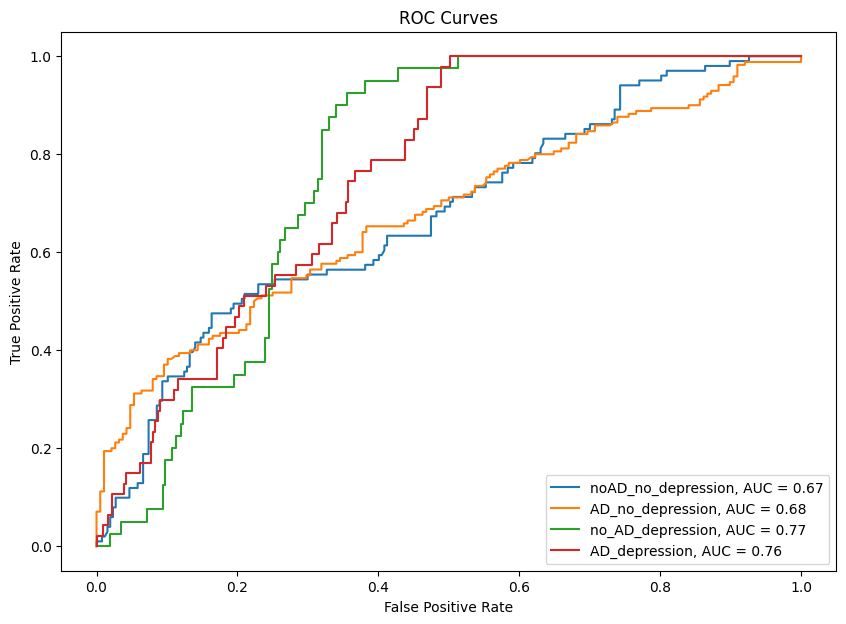

In [ ]:
rf_best_params = {
    "random_forest__n_estimators" : 200,
    "random_forest__max_depth" : 10,
    "random_forest__min_samples_leaf" : 15,
    "random_forest__max_features" : 'sqrt'
}

# Updating the model's hyperparameters with the best parameters identified from the Grid Search.
model = model.set_params(**rf_best_params)

# Retraining the model with the updated hyperparameters on the training data.
model = model.fit(X_train, Y_train)

# Predicting the target variable on the training set and evaluating the model's accuracy.
Y_pred = model.predict(X_train)
accuracy_score(Y_train, Y_pred)

# Predicting the target variable on the test set and evaluating the model's accuracy.
Y_pred_rf = model.predict(X_test)
Y_pred_prob_rf = model.predict_proba(X_test)

# Evaluating the model's performance on the validation set
conf_matrix, class_report, acc = get_scores(Y_test, Y_pred_rf)

# printing AUC scores and ROC curves
print_scores(conf_matrix, class_report, acc)

# visualizing confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

multi_class_roc(Y_test, Y_pred_prob_rf, Y_pred_rf, "RF")

# 7.3 Implementing an XGBoost Classifier

In [ ]:
# Initializing the Gradient Boosting model with initial parameters
random_forest = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

# Creating a pipeline that runs the Gradient Boosting model
model = Pipeline([
    ('xg_boost', random_forest)
])

In [ ]:
model = model.fit(X_train, Y_train)

# Predicting the target variable on the training set and evaluating the model's accuracy.
Y_pred = model.predict(X_train)
print("Initial Train Accuracy:", accuracy_score(Y_train, Y_pred))

# Predicting the target variable on the test set and evaluating the model's accuracy.
Y_pred = model.predict(X_test)
print("Initial Test Accuracy:", accuracy_score(Y_test, Y_pred))

Initial Train Accuracy: 0.8622359154929577
Initial Test Accuracy: 0.30446927374301674


## 7.3.1 Hyperparameter Tuning Using Grid Search - XGBoost

In [ ]:
# Defining the hyperparameters to be tuned using GridSearchCV
param_dist = {
    "xg_boost__n_estimators" : [100, 200],
    "xg_boost__max_depth" : [1, 5],
    "xg_boost__min_samples_leaf" : [25],
    "xg_boost__learning_rate" : [.1,  .2]
}

# Using StratifiedKFold for cross-validation, ensuring each fold has the same proportion of observations with each target value
skf = StratifiedKFold(n_splits=5)

# Setting up the GridSearchCV to find the best hyperparameters for the Gradient Boosting model
random_search = GridSearchCV(
    model, param_grid=param_dist, cv=skf
)

# Fitting the GridSearchCV on the training data
random_search.fit(X_train, Y_train)

# Storing and displaying the results of the grid search
results = pd.DataFrame(random_search.cv_results_)
results[results['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xg_boost__learning_rate,param_xg_boost__max_depth,param_xg_boost__min_samples_leaf,param_xg_boost__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,12.543317,0.163739,0.013562,0.001432,0.2,5,25,200,"{'xg_boost__learning_rate': 0.2, 'xg_boost__ma...",0.806593,0.815385,0.848018,0.823789,0.825991,0.823955,0.013842,1


## 7.3.2 XGBoost Model Testing

Accuracy :  0.32122905027932963
Confusion Matrix:
[[39 18 43  1]
 [63 33 62 12]
 [ 0  0 40  0]
 [ 0  0 44  3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.39      0.38       101
           1       0.65      0.19      0.30       170
           2       0.21      1.00      0.35        40
           3       0.19      0.06      0.10        47

    accuracy                           0.32       358
   macro avg       0.36      0.41      0.28       358
weighted avg       0.46      0.32      0.30       358



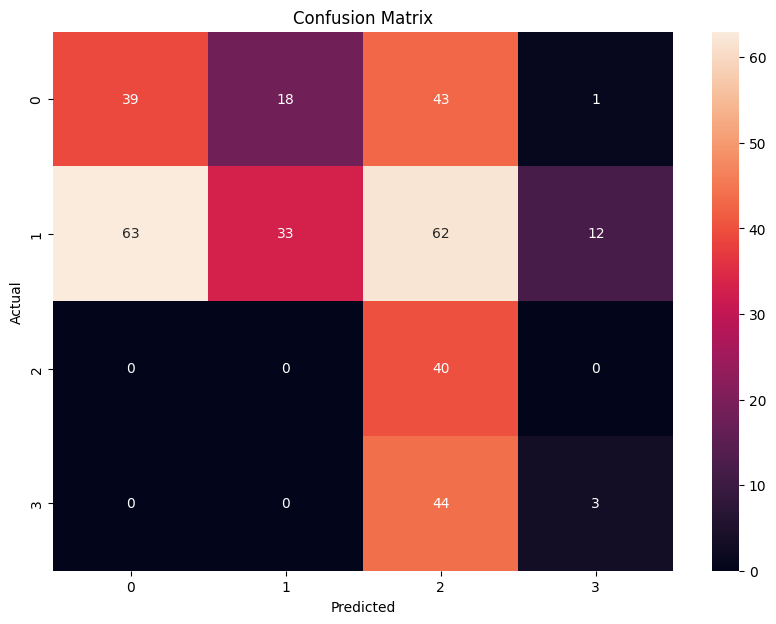

Accuracy: 0.32122905027932963
Sensitivity (Recall): 0.4110215120385631
Specificity: 0.7871912575118003
Precision: 0.35713799408652347
F1 Score: 0.28186551513566405
AUC: 0.7233493521453651


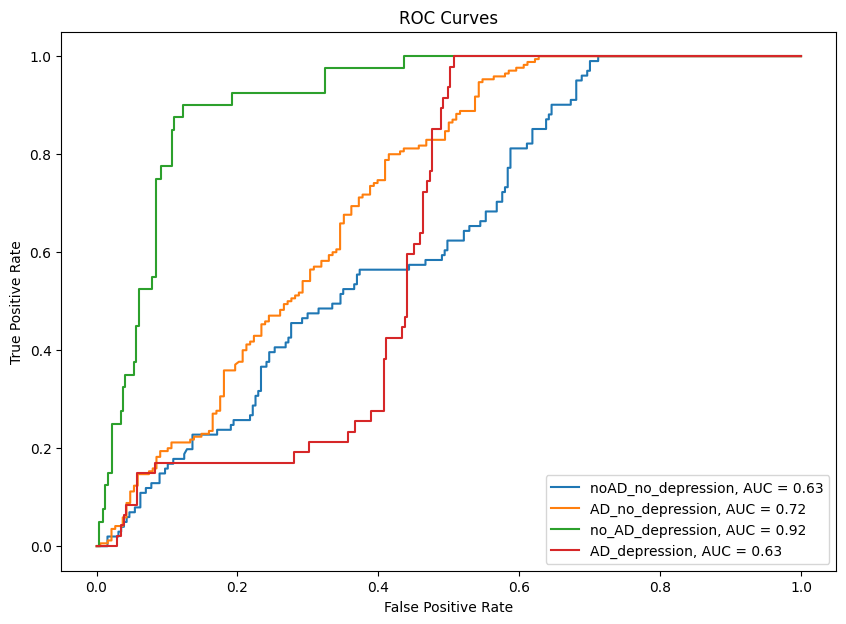

In [ ]:
xgb_best_params = {
    "xg_boost__n_estimators" : 200,
    "xg_boost__max_depth" : 5,
    "xg_boost__min_samples_leaf" : 25,
    "xg_boost__learning_rate" : .2
}


# Updating the model's parameters with the best ones found from GridSearchCV
model = model.set_params(**xgb_best_params)
# Retraining the model with the best parameters on the training dataset
model = model.fit(X_train, Y_train)

# Predicting the target variable on the training set and evaluating the model's accuracy.
Y_pred = model.predict(X_train)
accuracy_score(Y_train, Y_pred)

# Predicting the target variable on the test set and evaluating the model's accuracy.
Y_pred_xgb = model.predict(X_test)
Y_pred_prob_xgb = model.predict_proba(X_test)

# Evaluating the model's performance on the validation set
conf_matrix, class_report, acc = get_scores(Y_test, Y_pred_xgb)

# printing AUC scores and ROC curves
print_scores(conf_matrix, class_report, acc)

# visualizing confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

multi_class_roc(Y_test, Y_pred_prob_xgb, Y_pred_xgb, "XGB")

# 8. Support Vector Machine (SVM)

In [ ]:
# Import necessary libraries/modules
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.svm import SVC  # Support Vector Classifier (SVM) for classification
from sklearn.metrics import classification_report, accuracy_score  # For evaluating the classifier
from sklearn.pipeline import Pipeline  # For creating a machine learning pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold  # For hyperparameter tuning and cross-validation

## 8.1 Selecting Cognitive Test Score (CTS) Data

In [ ]:
from collections import Counter
# selecting only cognitive test score columns from previously split data
X_train_cts = X_train_data[cognitive]
X_test_cts = X_test[cognitive]

In [ ]:
y_train_cts = Y_train_data
y_test_cts = Y_test_df

## 8.2 Hyperparameter Tuning using Grid Search

In [ ]:
# Create an instance of the Support Vector Classifier (SVC) with class weight balancing
svm = SVC(class_weight='balanced')

# Define a dictionary of hyperparameter values to search over - performing for each kernel separately (took >4h when evaluating them together)
param_dist = {
    'class_weight': [None, 'balanced'],  # Options for class weight balancing
    'C': [0.1, 1, 10],  # Regularization parameter values to search
    'kernel': ['linear'],  # linear
    #'kernel': ['poly'],  # poly
    #'kernel': ['rbf'],  # rbf
    #'kernel': ['sigmoid'],  # sigmoid
    #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.01, 1, 10]  # Kernel coefficient values to search
}

# Create a StratifiedKFold cross-validation object with 3 folds
skf = StratifiedKFold(n_splits=5)

# Perform a grid search with cross-validation to find the best hyperparameters
random_search = GridSearchCV(
    svm,  # SVM classifier instance
    param_grid=param_dist,  # Hyperparameter grid to search
    cv=skf,  # Cross-validation strategy (StratifiedKFold)
    scoring='f1_micro'  # Scoring metric ('f1_micro' for balanced evaluation)
)

# Perform a grid search with cross-validation to find the best hyperparameters for an SVM model.
random_search.fit(X_train_cts, y_train_cts)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10], 'class_weight': [None, 'balanced'],
                         'gamma': [0.01, 1, 10], 'kernel': ['linear']},
             scoring='f1_micro')

In [ ]:
# Create a DataFrame to store the results of the grid search.
results = pd.DataFrame(random_search.cv_results_)

# Filter and select the best-performing hyperparameter set based on the 'rank_test_score'.
# The hyperparameter set with the lowest rank_test_score is considered the best.
best_results = results[results['rank_test_score'] == 1]

for i in results[results['rank_test_score'] == 1]['params']:
  print(i)

{'C': 10, 'class_weight': None, 'gamma': 0.01, 'kernel': 'linear'}
{'C': 10, 'class_weight': None, 'gamma': 1, 'kernel': 'linear'}
{'C': 10, 'class_weight': None, 'gamma': 10, 'kernel': 'linear'}


In [ ]:
# Best Parameters After Separate Testing
linear_params = {'C': 0.1, 'class_weight': None, 'gamma': 0.01, 'kernel': 'linear'}
poly_params = {'class_weight': None, 'C': 0.01, 'kernel': 'poly', 'gamma': 1, 'degree': 2}
rbf_params = {'C': 1, 'class_weight': None, 'gamma': 1, 'kernel': 'rbf'}
sigmoid_params = {'C': 1, 'class_weight': None, 'gamma': 0.01, 'kernel': 'sigmoid'}

## 8.3 Model Testing

## 8.3.1 SVM Model Testing With Linear Kernel

In [ ]:
# Set the hyperparameters of the SVM model to the best parameters found during the random search.
model = svm.set_params(**linear_params, probability=True) #change this to whatever parameters you want to test

# Train the SVM model using the training data.
model = model.fit(X_train_cts, y_train_cts)

# Use the trained model to predict the training and test data.
y_pred_train = model.predict(X_train_cts)
y_pred_test = model.predict(X_test_cts)

# Print performance metrics for the training data
print('----------- Train --------------')
print("Accuracy:", accuracy_score(y_train_cts, y_pred_train))
print("\nClassification Report:\n", classification_report(y_train_cts, y_pred_train))

# Print performance metrics for the test data.
print('----------- Test --------------')
print("Accuracy:", accuracy_score(y_test_cts, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test_cts, y_pred_test))

# Predicting the target variable on the test set and evaluating the model's accuracy.
Y_svm_linear = model.predict(X_test_cts)
Y_pred_svm_linear = model.predict_proba(X_test_cts)

# Evaluating the model's performance on the validation set
conf_matrix, class_report, acc = get_scores(y_test_cts, Y_svm_linear)

# printing AUC scores and ROC curves
print_scores(conf_matrix, class_report, acc)

multi_class_auc(y_test_cts, Y_pred_svm_linear)

----------- Train --------------
Accuracy: 0.40757042253521125

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.06      0.10       412
           1       0.35      0.56      0.43       724
           2       0.00      0.00      0.00       340
           3       0.48      0.62      0.54       796

    accuracy                           0.41      2272
   macro avg       0.30      0.31      0.27      2272
weighted avg       0.34      0.41      0.34      2272

----------- Test --------------
Accuracy: 0.36312849162011174

Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.48      0.34       101
           1       0.47      0.48      0.47       170
           2       0.00      0.00      0.00        40
           3       0.00      0.00      0.00        47

    accuracy                           0.36       358
   macro avg       0.18      0.24      0.20       358
weighted a

## 8.3.2 SVM Model Testing with Polynomial Kernel

----------- Train --------------
Accuracy: 0.6346830985915493

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.23      0.35       412
           1       0.53      0.71      0.61       724
           2       0.73      0.59      0.65       340
           3       0.71      0.80      0.75       796

    accuracy                           0.63      2272
   macro avg       0.67      0.58      0.59      2272
weighted avg       0.65      0.63      0.62      2272

----------- Test --------------
Accuracy: 0.3659217877094972

Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.84      0.46       101
           1       0.57      0.27      0.37       170
           2       0.00      0.00      0.00        40
           3       0.00      0.00      0.00        47

    accuracy                           0.37       358
   macro avg       0.22      0.28      0.21       358
weighted avg

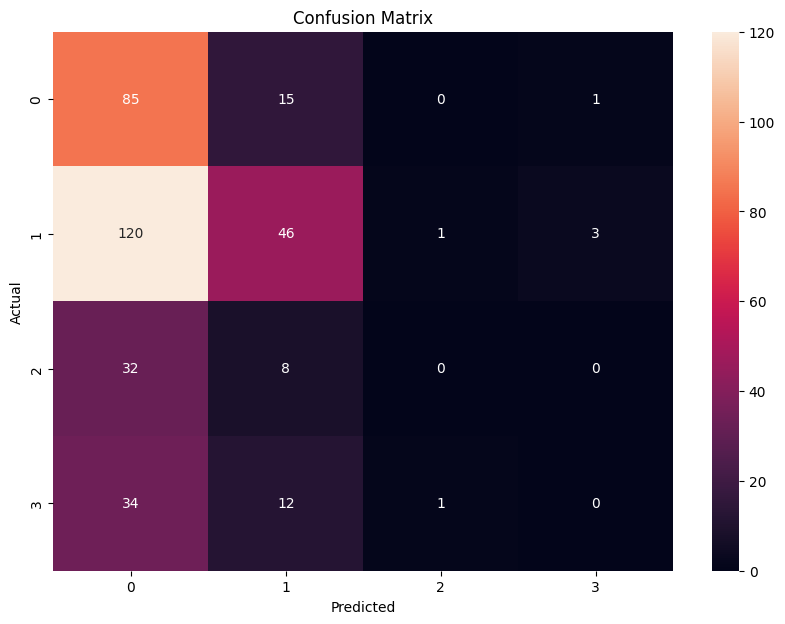

Accuracy: 0.3659217877094972
Sensitivity (Recall): 0.2780430984274898
Specificity: 0.7677358335115494
Precision: 0.22038859277481665
F1 Score: 0.20588077796341514
AUC: 0.5777978542649116


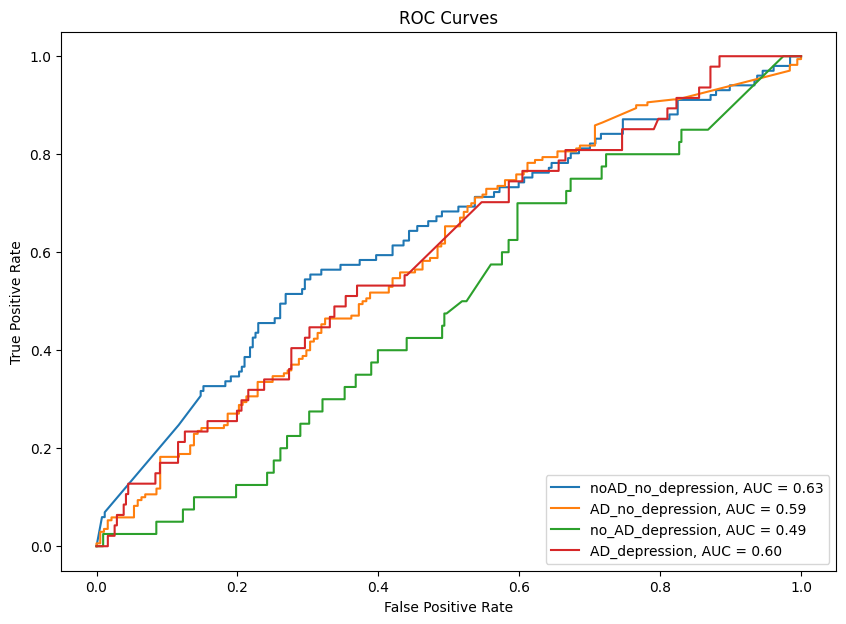

In [ ]:
# Set the hyperparameters of the SVM model to the best parameters found during the random search.
model = svm.set_params(**poly_params, probability=True) #change this to whatever parameters you want to test

# Train the SVM model using the training data.
model = model.fit(X_train_cts, y_train_cts)

# Use the trained model to predict the training and test data.
y_pred_train = model.predict(X_train_cts)
y_pred_test = model.predict(X_test_cts)

# Print performance metrics for the training data
print('----------- Train --------------')
print("Accuracy:", accuracy_score(y_train_cts, y_pred_train))
print("\nClassification Report:\n", classification_report(y_train_cts, y_pred_train))

# Print performance metrics for the test data.
print('----------- Test --------------')
print("Accuracy:", accuracy_score(y_test_cts, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test_cts, y_pred_test))

# Predicting the target variable on the test set and evaluating the model's accuracy.
Y_svm_poly = model.predict(X_test_cts)
Y_pred_svm_poly = model.predict_proba(X_test_cts)

# Evaluating the model's performance on the validation set
conf_matrix, class_report, acc = get_scores(y_test_cts, Y_svm_poly)

# printing AUC scores and ROC curves
print_scores(conf_matrix, class_report, acc)

# visualizing confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

multi_class_roc(y_test_cts, Y_pred_svm_poly, Y_svm_poly, "SVM")

## 8.3.3 Model Testing With RBF Kernel

In [ ]:
# Set the hyperparameters of the SVM model to the best parameters found during the random search.
model = svm.set_params(**rbf_params, probability=True) #change this to whatever parameters you want to test

# Train the SVM model using the training data.
model = model.fit(X_train_cts, y_train_cts)

# Use the trained model to predict the training and test data.
y_pred_train = model.predict(X_train_cts)
y_pred_test = model.predict(X_test_cts)

# Print performance metrics for the training data
print('----------- Train --------------')
print("Accuracy:", accuracy_score(y_train_cts, y_pred_train))
print("\nClassification Report:\n", classification_report(y_train_cts, y_pred_train))

# Print performance metrics for the test data.
print('----------- Test --------------')
print("Accuracy:", accuracy_score(y_test_cts, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test_cts, y_pred_test))

# Predicting the target variable on the test set and evaluating the model's accuracy.
Y_svm_rbf = model.predict(X_test_cts)
Y_pred_svm_rbf = model.predict_proba(X_test_cts)

# Evaluating the model's performance on the validation set
conf_matrix, class_report, acc = get_scores(y_test_cts, Y_svm_rbf)

# printing AUC scores and ROC curves
print_scores(conf_matrix, class_report, acc)

multi_class_auc(y_test_cts, Y_pred_svm_rbf)

----------- Train --------------
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       724
           2       1.00      1.00      1.00       340
           3       1.00      1.00      1.00       796

    accuracy                           1.00      2272
   macro avg       1.00      1.00      1.00      2272
weighted avg       1.00      1.00      1.00      2272

----------- Test --------------
Accuracy: 0.4748603351955307

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.47      1.00      0.64       170
           2       0.00      0.00      0.00        40
           3       0.00      0.00      0.00        47

    accuracy                           0.47       358
   macro avg       0.12      0.25      0.16       358
weighted avg       0.23    

## 8.3.4 SVM Model Testing with Sigmoid Kernel

In [ ]:
# Set the hyperparameters of the SVM model to the best parameters found during the random search.
model = svm.set_params(**sigmoid_params, probability=True) #change this to whatever parameters you want to test

# Train the SVM model using the training data.
model = model.fit(X_train_cts, y_train_cts)

# Use the trained model to predict the training and test data.
y_pred_train = model.predict(X_train_cts)
y_pred_test = model.predict(X_test_cts)

# Print performance metrics for the training data
print('----------- Train --------------')
print("Accuracy:", accuracy_score(y_train_cts, y_pred_train))
print("\nClassification Report:\n", classification_report(y_train_cts, y_pred_train))

# Print performance metrics for the test data.
print('----------- Test --------------')
print("Accuracy:", accuracy_score(y_test_cts, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test_cts, y_pred_test))

# Predicting the target variable on the test set and evaluating the model's accuracy.
Y_svm_sigmoid = model.predict(X_test_cts)
Y_pred_svm_sigmoid = model.predict_proba(X_test_cts)

# Evaluating the model's performance on the validation set
conf_matrix, class_report, acc = get_scores(y_test_cts, Y_svm_sigmoid)

# printing AUC scores and ROC curves
print_scores(conf_matrix, class_report, acc)

multi_class_auc(y_test_cts, Y_pred_svm_sigmoid)

----------- Train --------------
Accuracy: 0.3873239436619718

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.05      0.08       412
           1       0.32      0.53      0.40       724
           2       0.00      0.00      0.00       340
           3       0.47      0.60      0.52       796

    accuracy                           0.39      2272
   macro avg       0.30      0.29      0.25      2272
weighted avg       0.34      0.39      0.33      2272

----------- Test --------------
Accuracy: 0.4301675977653631

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.01      0.02       101
           1       0.48      0.89      0.62       170
           2       0.00      0.00      0.00        40
           3       0.03      0.02      0.02        47

    accuracy                           0.43       358
   macro avg       0.21      0.23      0.17       358
weighted avg

# Plot of All ROC Curves By Class

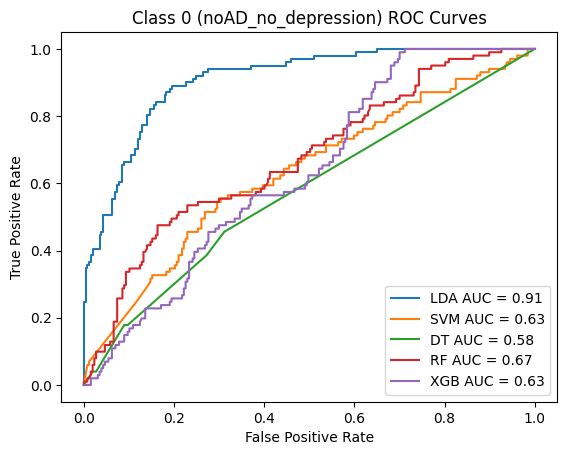

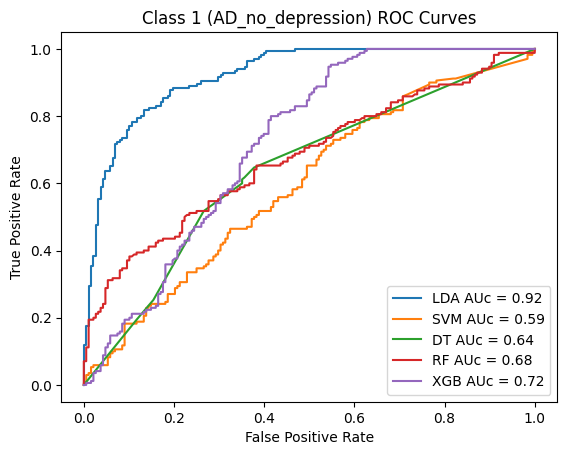

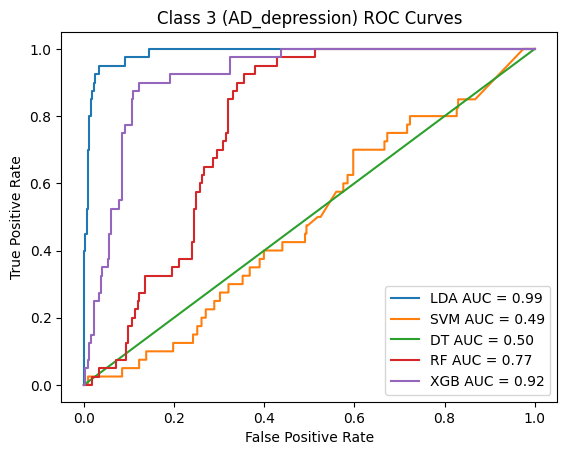

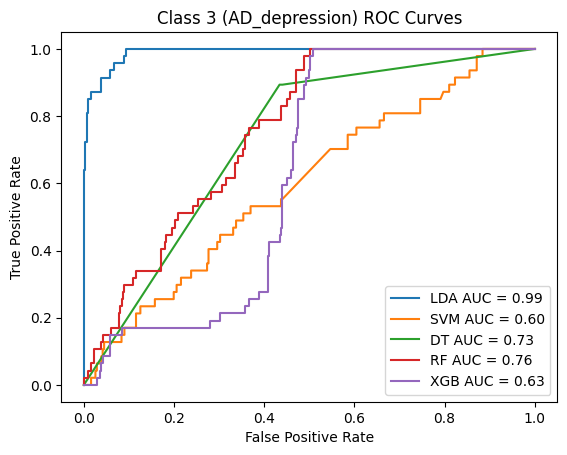

In [ ]:
########### CLASS 0
# saving fpr, tpr, auc in an ordered list to plot
class0_fpr_list = [i for i in class0_fpr.values()]
class0_tpr_list = [i for i in class0_tpr.values()]
class0_auc_list = [i for i in class0_auc.values()]
auc_model = [i for i in class0_fpr.keys()]

for i in range(len(class0_fpr_list)):
  plt.plot(class0_fpr_list[i], class0_tpr_list[i], label= "{} AUC = {:.2f}".format(auc_model[i], class0_auc_list[i]))

plt.title("Class 0 (noAD_no_depression) ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

########### CLASS 1
# saving fpr, tpr, auc in an ordered list to plot
class1_fpr_list = [i for i in class1_fpr.values()]
class1_tpr_list = [i for i in class1_tpr.values()]
class1_auc_list = [i for i in class1_auc.values()]
auc_model = [i for i in class1_fpr.keys()]

for i in range(len(class1_fpr_list)):
  plt.plot(class1_fpr_list[i], class1_tpr_list[i], label= "{} AUc = {:.2f}".format(auc_model[i], class1_auc_list[i]))

plt.title("Class 1 (AD_no_depression) ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

########### CLASS 2
# saving fpr, tpr, auc in an ordered list to plot
class2_fpr_list = [i for i in class2_fpr.values()]
class2_tpr_list = [i for i in class2_tpr.values()]
class2_auc_list = [i for i in class2_auc.values()]
auc_model = [i for i in class2_fpr.keys()]

for i in range(len(class2_fpr_list)):
  plt.plot(class2_fpr_list[i], class2_tpr_list[i], label= "{} AUC = {:.2f}".format(auc_model[i], class2_auc_list[i]))

plt.title("Class 3 (AD_depression) ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

########### CLASS 3
# saving fpr, tpr, auc in an ordered list to plot
class3_fpr_list = [i for i in class3_fpr.values()]
class3_tpr_list = [i for i in class3_tpr.values()]
class3_auc_list = [i for i in class3_auc.values()]
auc_model = [i for i in class3_fpr.keys()]

for i in range(len(class3_fpr_list)):
  plt.plot(class3_fpr_list[i], class3_tpr_list[i], label= "{} AUC = {:.2f}".format(auc_model[i], class3_auc_list[i]))

plt.title("Class 3 (AD_depression) ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

#9. NLP

In [ ]:
#importing data from github
paper_df = pd.read_csv('https://raw.githubusercontent.com/brenleighj/5230/main/ML%20paper%20data%20-%20Sheet1%20(1).csv')
paper_df.head()

,Title,Abstract,Discussion
0,Machine learning techniques for the diagnosis ...,Alzheimer’s disease is an incurable neurodegen...,In the classification of dementia related data...
1,A new machine learning method for identifying ...,Most of the studies on Alzheimer's disease (AD...,"From the experimental results, LogisticRegress..."
2,Machine learning techniques for diagnosis of a...,Alzheimer’s disease (AD) is one of the most co...,This paper presented a state-of the-art review...
3,Hippocampal shape analysis of Alzheimer diseas...,BACKGROUND AND PURPOSE: Alzheimer disease (AD)...,The main purpose of this study was to present ...
4,Machine learning for modeling the progression ...,Objective\nAlzheimer disease (AD) is the most ...,"AD is the most common cause of dementia, which..."


In [ ]:
import re  # Regular expressions library for text manipulation
from datetime import datetime  # Library for handling dates and times

In [ ]:
#An example of how to replace things- we dont have '¡¯' in the data set so i'm not gonna run it
# Define a cleaning function that will replace the incorrectly encoded characters.
def clean_encoding(text):
    # Replace the incorrect character sequences with the correct character.
    # You can chain multiple replace calls to handle different cases.
    text = text.replace('¡¯', "'")  # Replace the sequence that represents a single quote
    # Add additional replacements here if there are other encoding issues
    return text

# Apply the cleaning function to the 'tweet' column of the DataFrame.
#df['tweet'] = df['tweet'].apply(clean_encoding)
#df.head()

In [ ]:
!pip install contractions
import contractions

# Expand contractions in abstract
paper_df['Abstract_expanded'] = paper_df['Abstract'].apply(lambda x: contractions.fix(x))
paper_df.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 4.9 MB/s eta 0:00:00


,Title,Abstract,Discussion,Abstract_expanded
0,Machine learning techniques for the diagnosis ...,Alzheimer’s disease is an incurable neurodegen...,In the classification of dementia related data...,Alzheimer’s disease is an incurable neurodegen...
1,A new machine learning method for identifying ...,Most of the studies on Alzheimer's disease (AD...,"From the experimental results, LogisticRegress...",Most of the studies on Alzheimer's disease (AD...
2,Machine learning techniques for diagnosis of a...,Alzheimer’s disease (AD) is one of the most co...,This paper presented a state-of the-art review...,Alzheimer’s disease (AD) is one of the most co...
3,Hippocampal shape analysis of Alzheimer diseas...,BACKGROUND AND PURPOSE: Alzheimer disease (AD)...,The main purpose of this study was to present ...,BACKGROUND AND PURPOSE: Alzheimer disease (AD)...
4,Machine learning for modeling the progression ...,Objective\nAlzheimer disease (AD) is the most ...,"AD is the most common cause of dementia, which...",Objective\nAlzheimer disease (AD) is the most ...


In [ ]:
paper_df = paper_df.dropna()

In [ ]:
# Expand contractions in discussion
paper_df['Discussion_expanded'] = paper_df['Discussion'].apply(lambda x: contractions.fix(x))

In [ ]:
paper_df.head()

,Title,Abstract,Discussion,Abstract_expanded,Discussion_expanded
0,Machine learning techniques for the diagnosis ...,Alzheimer’s disease is an incurable neurodegen...,In the classification of dementia related data...,Alzheimer’s disease is an incurable neurodegen...,In the classification of dementia related data...
1,A new machine learning method for identifying ...,Most of the studies on Alzheimer's disease (AD...,"From the experimental results, LogisticRegress...",Most of the studies on Alzheimer's disease (AD...,"From the experimental results, LogisticRegress..."
2,Machine learning techniques for diagnosis of a...,Alzheimer’s disease (AD) is one of the most co...,This paper presented a state-of the-art review...,Alzheimer’s disease (AD) is one of the most co...,This paper presented a state-of the-art review...
3,Hippocampal shape analysis of Alzheimer diseas...,BACKGROUND AND PURPOSE: Alzheimer disease (AD)...,The main purpose of this study was to present ...,BACKGROUND AND PURPOSE: Alzheimer disease (AD)...,The main purpose of this study was to present ...
4,Machine learning for modeling the progression ...,Objective\nAlzheimer disease (AD) is the most ...,"AD is the most common cause of dementia, which...",Objective\nAlzheimer disease (AD) is the most ...,"AD is the most common because of dementia, whi..."


In [ ]:
# Let's perform some basic data cleaning tasks such as:
# - Lowercasing
# - Removing special characters and numbers
# - Removing Fig / Figure / Table

# Function to remove
def remove_Fig(text):
    return re.sub(r'fig', '', text)

def remove_Figure(text):
    return re.sub(r'figure', '', text)

def remove_Table(text):
    return re.sub(r'table', '', text)

# Function to remove special characters and numbers
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z\s]', '', text)

# Perform the data cleaning on the abstract
paper_df['Abstract'] = paper_df['Abstract_expanded'].str.lower() # I think this code is also making the coulmns equal to the expanded ones so we can work only with the normal columns now ??
paper_df['Abstract'] = paper_df['Abstract'].apply(remove_Fig)
paper_df['Abstract'] = paper_df['Abstract'].apply(remove_Figure)
paper_df['Abstract'] = paper_df['Abstract'].apply(remove_Table)
paper_df['Abstract'] = paper_df['Abstract'].apply(remove_special_characters)


#df['Emotion'] = df['Emotion'].replace('Netural', 'Neutral') # Correcting the spelling
#df['Emotion'] = df['Emotion'].str.capitalize()

paper_df.head()

,Title,Abstract,Discussion,Abstract_expanded,Discussion_expanded
0,Machine learning techniques for the diagnosis ...,alzheimers disease is an incurable neurodegene...,In the classification of dementia related data...,Alzheimer’s disease is an incurable neurodegen...,In the classification of dementia related data...
1,A new machine learning method for identifying ...,most of the studies on alzheimers disease ad h...,"From the experimental results, LogisticRegress...",Most of the studies on Alzheimer's disease (AD...,"From the experimental results, LogisticRegress..."
2,Machine learning techniques for diagnosis of a...,alzheimers disease ad is one of the most commo...,This paper presented a state-of the-art review...,Alzheimer’s disease (AD) is one of the most co...,This paper presented a state-of the-art review...
3,Hippocampal shape analysis of Alzheimer diseas...,background and purpose alzheimer disease ad is...,The main purpose of this study was to present ...,BACKGROUND AND PURPOSE: Alzheimer disease (AD)...,The main purpose of this study was to present ...
4,Machine learning for modeling the progression ...,objective\nalzheimer disease ad is the most co...,"AD is the most common cause of dementia, which...",Objective\nAlzheimer disease (AD) is the most ...,"AD is the most common because of dementia, whi..."


In [ ]:
# Perform the data cleaning on the Discussion
paper_df['Discussion'] = paper_df['Discussion_expanded'].str.lower() # I think this code is also making the coulmns equal to the expanded ones so we can work only with the normal columns now ??
paper_df['Discussion'] = paper_df['Discussion'].apply(remove_Fig)
paper_df['Discussion'] = paper_df['Discussion'].apply(remove_Figure)
paper_df['Discussion'] = paper_df['Discussion'].apply(remove_Table)
paper_df['Discussion'] = paper_df['Discussion'].apply(remove_special_characters)

# Perform the data cleaning on the Discussion
paper_df['Title'] = paper_df['Title'].str.lower()
paper_df['Title'] = paper_df['Title'].apply(remove_special_characters)

In [ ]:
#Creating a column with all of the test
# Not sure if i should remove double counted words here??

paper_df['Text'] = paper_df['Abstract'] + ' ' + paper_df['Discussion'] + ' ' + paper_df['Title']

##9.2 Tokenizaton

In [ ]:
!pip install nltk
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def tokenize_text(text):
   return word_tokenize(text)

paper_df['Text'] = paper_df['Text'].apply(tokenize_text)
paper_df.head()

,Title,Abstract,Discussion,Abstract_expanded,Discussion_expanded,Text
0,machine learning techniques for the diagnosis ...,alzheimers disease is an incurable neurodegene...,in the classification of dementia related data...,Alzheimer’s disease is an incurable neurodegen...,In the classification of dementia related data...,"[alzheimers, disease, is, an, incurable, neuro..."
1,a new machine learning method for identifying ...,most of the studies on alzheimers disease ad h...,from the experimental results logisticregressi...,Most of the studies on Alzheimer's disease (AD...,"From the experimental results, LogisticRegress...","[most, of, the, studies, on, alzheimers, disea..."
2,machine learning techniques for diagnosis of a...,alzheimers disease ad is one of the most commo...,this paper presented a stateof theart review o...,Alzheimer’s disease (AD) is one of the most co...,This paper presented a state-of the-art review...,"[alzheimers, disease, ad, is, one, of, the, mo..."
3,hippocampal shape analysis of alzheimer diseas...,background and purpose alzheimer disease ad is...,the main purpose of this study was to present ...,BACKGROUND AND PURPOSE: Alzheimer disease (AD)...,The main purpose of this study was to present ...,"[background, and, purpose, alzheimer, disease,..."
4,machine learning for modeling the progression ...,objective\nalzheimer disease ad is the most co...,ad is the most common because of dementia whic...,Objective\nAlzheimer disease (AD) is the most ...,"AD is the most common because of dementia, whi...","[objective, alzheimer, disease, ad, is, the, m..."


###9.3 Stop words

In [ ]:
# Import the 'stopwords' corpus from the Natural Language Toolkit (NLTK)
from nltk.corpus import stopwords

# Download the set of stopwords from NLTK. This is necessary the first time you run this code.
nltk.download('stopwords')

# Define a function that removes stop words from a list of tokens.
# Stop words are common words that are usually filtered out in NLP tasks.
def remove_stop_words(tokens):
    # Create a set of English stop words. Sets are faster for membership tests than lists.
    stop_words_set = set(stopwords.words('english'))

    # Return a new list that contains only the tokens that are not stop words.
    # The token is also converted to lowercase to ensure case-insensitive matching.
    return [token for token in tokens if token.lower() not in stop_words_set]

# Apply the 'remove_stop_words' function to the 'tokens' column of the dataframe 'df'.
# The result is a new column 'tokens_no_stop' in the dataframe 'df'.
paper_df['Text_no_stop'] = paper_df['Text'].apply(remove_stop_words)

paper_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Title,Abstract,Discussion,Abstract_expanded,Discussion_expanded,Text,Text_no_stop
0,machine learning techniques for the diagnosis ...,alzheimers disease is an incurable neurodegene...,in the classification of dementia related data...,Alzheimer’s disease is an incurable neurodegen...,In the classification of dementia related data...,"[alzheimers, disease, is, an, incurable, neuro...","[alzheimers, disease, incurable, neurodegenera..."
1,a new machine learning method for identifying ...,most of the studies on alzheimers disease ad h...,from the experimental results logisticregressi...,Most of the studies on Alzheimer's disease (AD...,"From the experimental results, LogisticRegress...","[most, of, the, studies, on, alzheimers, disea...","[studies, alzheimers, disease, ad, carried, us..."
2,machine learning techniques for diagnosis of a...,alzheimers disease ad is one of the most commo...,this paper presented a stateof theart review o...,Alzheimer’s disease (AD) is one of the most co...,This paper presented a state-of the-art review...,"[alzheimers, disease, ad, is, one, of, the, mo...","[alzheimers, disease, ad, one, common, form, d..."
3,hippocampal shape analysis of alzheimer diseas...,background and purpose alzheimer disease ad is...,the main purpose of this study was to present ...,BACKGROUND AND PURPOSE: Alzheimer disease (AD)...,The main purpose of this study was to present ...,"[background, and, purpose, alzheimer, disease,...","[background, purpose, alzheimer, disease, ad, ..."
4,machine learning for modeling the progression ...,objective\nalzheimer disease ad is the most co...,ad is the most common because of dementia whic...,Objective\nAlzheimer disease (AD) is the most ...,"AD is the most common because of dementia, whi...","[objective, alzheimer, disease, ad, is, the, m...","[objective, alzheimer, disease, ad, common, de..."


In [ ]:
# Define additional context-sensitive stop words
context_sensitive_stop_words = set(['alzheimers', 'disease', 'ad', 'depression', 'classification', 'machine', 'learning', 'model', 'models', 'data',
                                    'accuracy', 'study', 'studies','et', 'methods', 'results', 'conclusion', 'abstract', 'background', 'features',
                                    'predict', 'prediction', 'dataset', 'ml', 'method', 'al', 'used', 'using', 'classifier', 'variable', 'research',

                                    # other common research-related stop words?
                                    'brain', 'any', 'given','papers','paper','about', 'result','page','article', 'takes','account', 'previous','work',
                                    'propose','proposes','proposed','demonstrate','demonstrated','demonstrates','datasets', 'dataset','researchers',
                                    'experiments','experiment','using','recent', 'collected','solve','columns','existing','final','consider','presented',
                                    'provides','extracting','explore','illustrate', 'future', 'past', 'respectively', 'comprises', 'whereas'
                                    'consists', 'therefore', 'thus', 'so', 'thereby', 'present', 'presented', 'presents','may', 'via', 'vice versa', 'mdd',
                                    'eeg', 'mci', 'psd', 'pd', 'further', 'due', 'pvalue', 'chisquare', 'moreover', 'mri', 'ct', 'furthermore', 'image',
                                    'figure', 'figures', 'images', 'adni', 'graph', 'plot', 'cognitive', 'bio', 'biology', 'marker', 'biomarker',
                                    'biomarkers', 'objective', 'show', 'shows', 'showed', 'showing', 'dementia', 'alzheimer',

                                    # alphabet and roman numerals to remove references to figures; #s 0-9 might be spelled out in formal writing
                                    'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w',
                                    'x', 'y', 'z', 'ii', 'iii', 'iv', 'vi', 'ie', 'eg','ex', 'etc', 'one', 'two', 'three', 'four', 'five', 'six', 'seven',
                                    'eight', 'nine'
                                    ])

# English stop words
stop_words_set = set(stopwords.words('english'))

# Extend the previously defined function to remove both general and context-sensitive stop words
def remove_context_sensitive_stop_words(tokens):
    # Combine the general English stop words with the context-specific stop words
    # to create a comprehensive set of words to filter out.
    all_stop_words = stop_words_set | context_sensitive_stop_words
    return [token for token in tokens if token.lower() not in all_stop_words]

# Apply the updated function to remove both general and context-sensitive stop words
paper_df['Text_no_stop'] = paper_df['Text'].apply(remove_context_sensitive_stop_words)

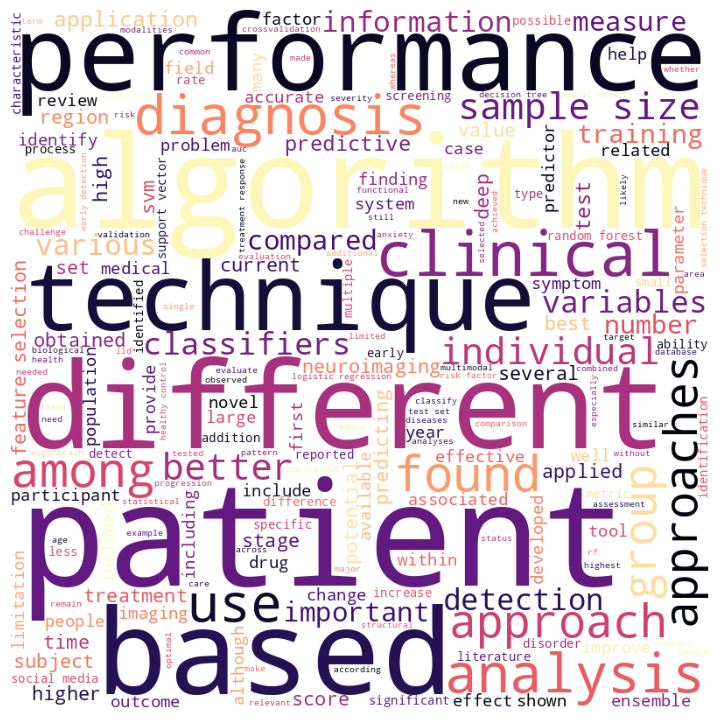

In [ ]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Combine all tokens from the 'tokens_no_stop_context' column into a single list
# Remove .head(5000) to generate the word cloud for the entire dataset
all_tokens = sum(paper_df['Text_no_stop'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

##9.4 Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Function to map NLTK position tags to WordNet tags
def get_wordnet_pos(word, pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens with POS tags
def lemmatize_tokens_with_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word, tag)) for word, tag in tagged_tokens]

# Apply this function to the 'tokens' column
paper_df['lemmatized'] = paper_df['Text_no_stop'].apply(lemmatize_tokens_with_pos)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


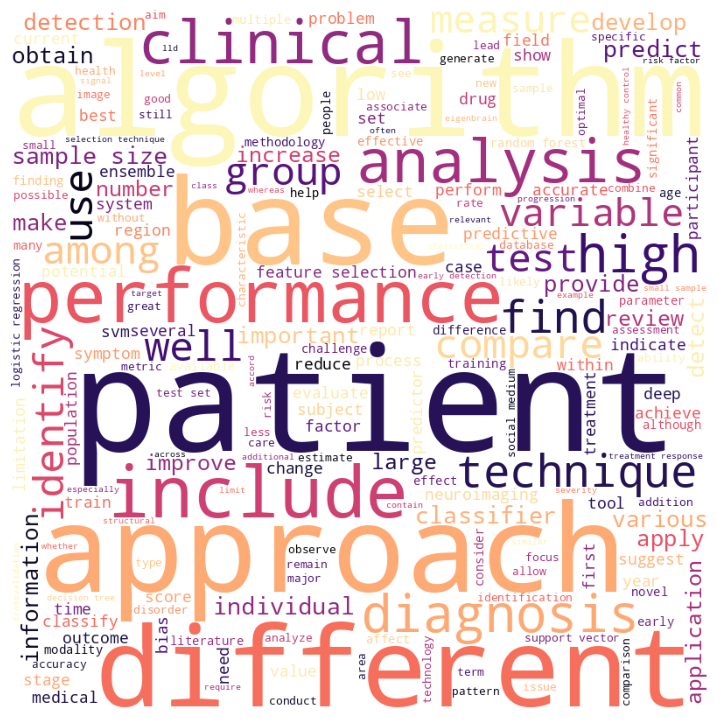

In [ ]:
#word cloud
all_lem_tokens = sum(paper_df['lemmatized'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_lem_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
#Maybe to investiage diversity / equity further we can specifically look at the counts / appearences of words realting to that topic

In [ ]:
from collections import Counter

all_tokens = [token for sublist in paper_df['lemmatized'] for token in sublist]

token_counts = Counter(all_tokens)


In [ ]:
token_counts['diversity']

3

In [ ]:
token_counts['equity']

0

In [ ]:
token_counts['equality']

0

In [ ]:
token_counts['race']

1

In [ ]:
token_counts['inclusion']

8

In [ ]:
token_counts['patient']

227

In [ ]:
token_counts['algorithm']

105

In [ ]:
token_counts['base']

140

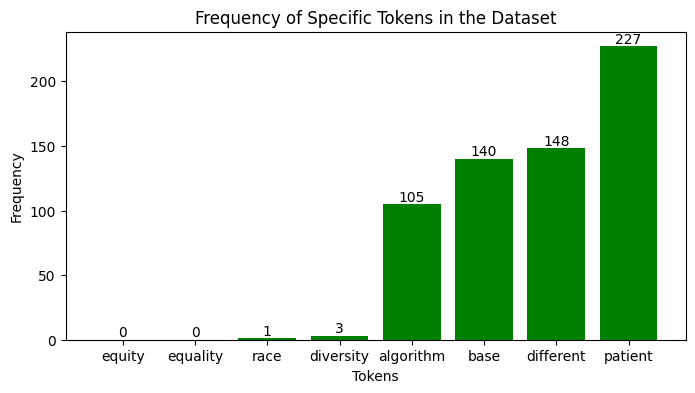

In [ ]:
#Comparing token frequencies

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Assuming 'all_tokens' is your list of tokens
token_counts = Counter(all_tokens)

# List of specific tokens you are interested in
specific_tokens = [ 'equity', 'equality', 'race', 'diversity','algorithm', 'base', 'different', 'patient' ]

# Extract counts for the specific tokens
specific_token_counts = {token: token_counts[token] for token in specific_tokens}

# Convert to DataFrame for plotting
df_specific_tokens = pd.DataFrame(specific_token_counts.items(), columns=['Token', 'Frequency'])

# Plotting
fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(df_specific_tokens['Token'], df_specific_tokens['Frequency'], color=['green'])
ax.bar_label(bars)
ax.set_xlabel('Tokens')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Specific Tokens in the Dataset')
plt.show()
